In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import scipy.stats as stats
from sklearn.random_projection import GaussianRandomProjection

import itertools



### CPA Dataset

In [2]:
# Normalize the data
# scaler = StandardScaler()
# normalized_features = scaler.fit_transform(features)

# # Split into training and test sets
# X_train, X_test = train_test_split(normalized_features, test_size=0.2, random_state=30)

In [3]:
# Load dataset
data = pd.read_csv('Input_data/cpa_preprocessed.csv')

# Define high traffic in-person shopper threshold
high_traffic_threshold = data['NumStorePurchases'].median()  # Arbritrary threshold based on median

# Create target variable
data['HighTrafficShopper'] = (data['NumStorePurchases'] > high_traffic_threshold).astype(int)

# Drop the NumStorePurchases column as it is now represented in the target variable
cpa_df = data.drop(columns=['NumStorePurchases'])


# Drop target variable
target  =   data['HighTrafficShopper']  # Target variable
cpa_input_data = data.drop(columns=['NumStorePurchases', 'HighTrafficShopper'])




In [4]:
cpa_input_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Customer_Tenure,Customer_Age_Years,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,663,55,True,False,False,False,True,False,False
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,113,60,True,False,False,False,True,False,False
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,312,48,True,False,False,False,False,True,False
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,139,30,True,False,False,False,False,True,False
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,161,33,False,False,True,True,False,False,False


##### cpa Dimension Reduction using PCA


In [5]:
# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(cpa_input_data)

# Split into training and test sets
cpa_train, cpa_test, y_cpa_train, y_cpa_test = train_test_split(normalized_features, target, test_size=0.2, random_state=30)

# spotify_train, spotify_test = train_test_split(spotify_selected_scaled, test_size=0.2, random_state=30)

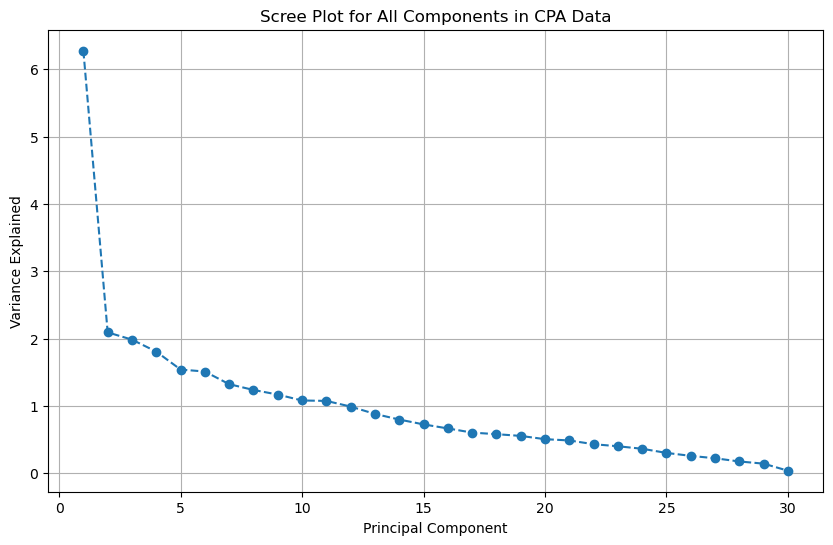

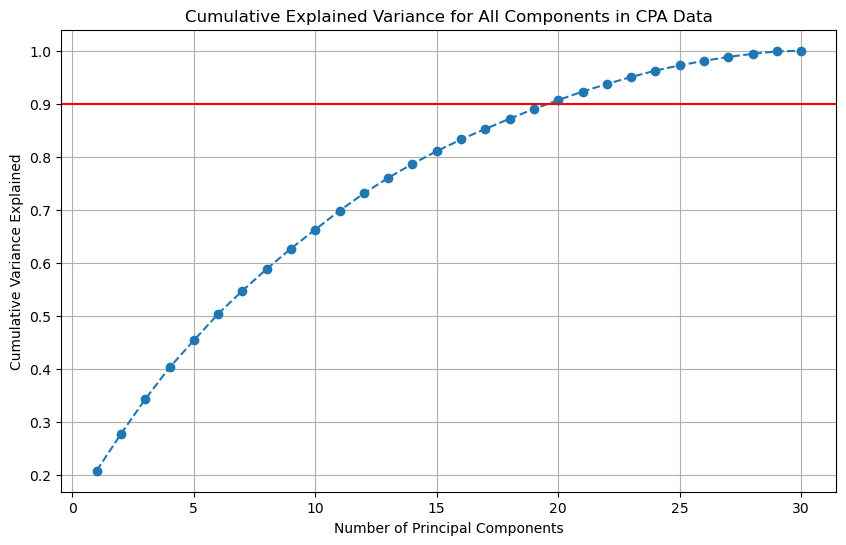

In [6]:
# Apply PCA
pca_selected = PCA()
cpa_pca_selected_transformed = pca_selected.fit_transform(cpa_train)

# Explained variance ratio
explained_variance_selected = pca_selected.explained_variance_
explained_variance_selected_ratio = pca_selected.explained_variance_ratio_

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_selected) + 1), explained_variance_selected, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot for All Components in CPA Data')
plt.grid()
plt.show()

# # Scree Plot
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(explained_variance_selected) + 1), explained_variance_selected_ratio, marker='o', linestyle='--')
# plt.xlabel('Principal Component')
# plt.ylabel('Variance Explained')
# plt.title('Scree Plot for All Components in CPA Data')
# plt.grid()
# plt.show()

# Cumulative Explained Variance
cumulative_variance_selected = np.cumsum(explained_variance_selected_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_selected) + 1), cumulative_variance_selected, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Explained Variance for All Components in CPA Data')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='-')
plt.show()

In [7]:
# # Create a biplot function
# def biplot(score, coeff, labels=None):
#     plt.figure(figsize=(10, 7))
#     plt.scatter(score[:, 0], score[:, 1], alpha=0.5)
#     for i in range(coeff.shape[0]):
#         plt.arrow(0, 0, coeff[i, 0]*2, coeff[i, 1]*2, color='r', alpha=0.5)
#         if labels is None:
#             plt.text(coeff[i, 0]*2.5, coeff[i, 1]*2.5, "Var" + str(i+1), color='g', ha='center', va='center')
#         else:
#             plt.text(coeff[i, 0]*2.5, coeff[i, 1]*2.5, labels[i], color='g', ha='center', va='center')
#     plt.xlabel("PC1")
#     plt.ylabel("PC2")
#     plt.title("PCA Biplot")
#     plt.grid()

# # Call the biplot function
# biplot(cpa_pca_selected_transformed, np.transpose(pca_selected.components_[:2, :]), labels=cpa_selected_df.columns)


In [8]:
# # Extract explained variance (absolute) and explained variance ratio (proportion)



# explained_variance_abs = pca_selected.explained_variance_
# explained_variance_ratio = pca_selected.explained_variance_ratio_

# # Create a comparison plot
# plt.figure(figsize=(12, 6))

# # Plot absolute explained variance
# plt.plot(range(1, len(explained_variance_abs) + 1), explained_variance_abs, marker='o', linestyle='--', label='Explained Variance (Absolute)')

# # Plot explained variance ratio
# plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='s', linestyle='-', label='Explained Variance Ratio')

# plt.xlabel('Principal Component')
# plt.ylabel('Variance')
# plt.title('Comparison of Absolute Explained Variance vs Explained Variance Ratio')
# plt.legend()
# plt.grid()
# plt.show()


In [9]:
# # visualize the principal components
# plt.scatter(spotify_pca_selected_transformed[:, 0], spotify_pca_selected_transformed[:, 1])
# plt.xlabel('PC 1')
# plt.ylabel('PC 2')
# plt.title('Scatter Plot of Principal Components')
# plt.grid()

# plt.show()


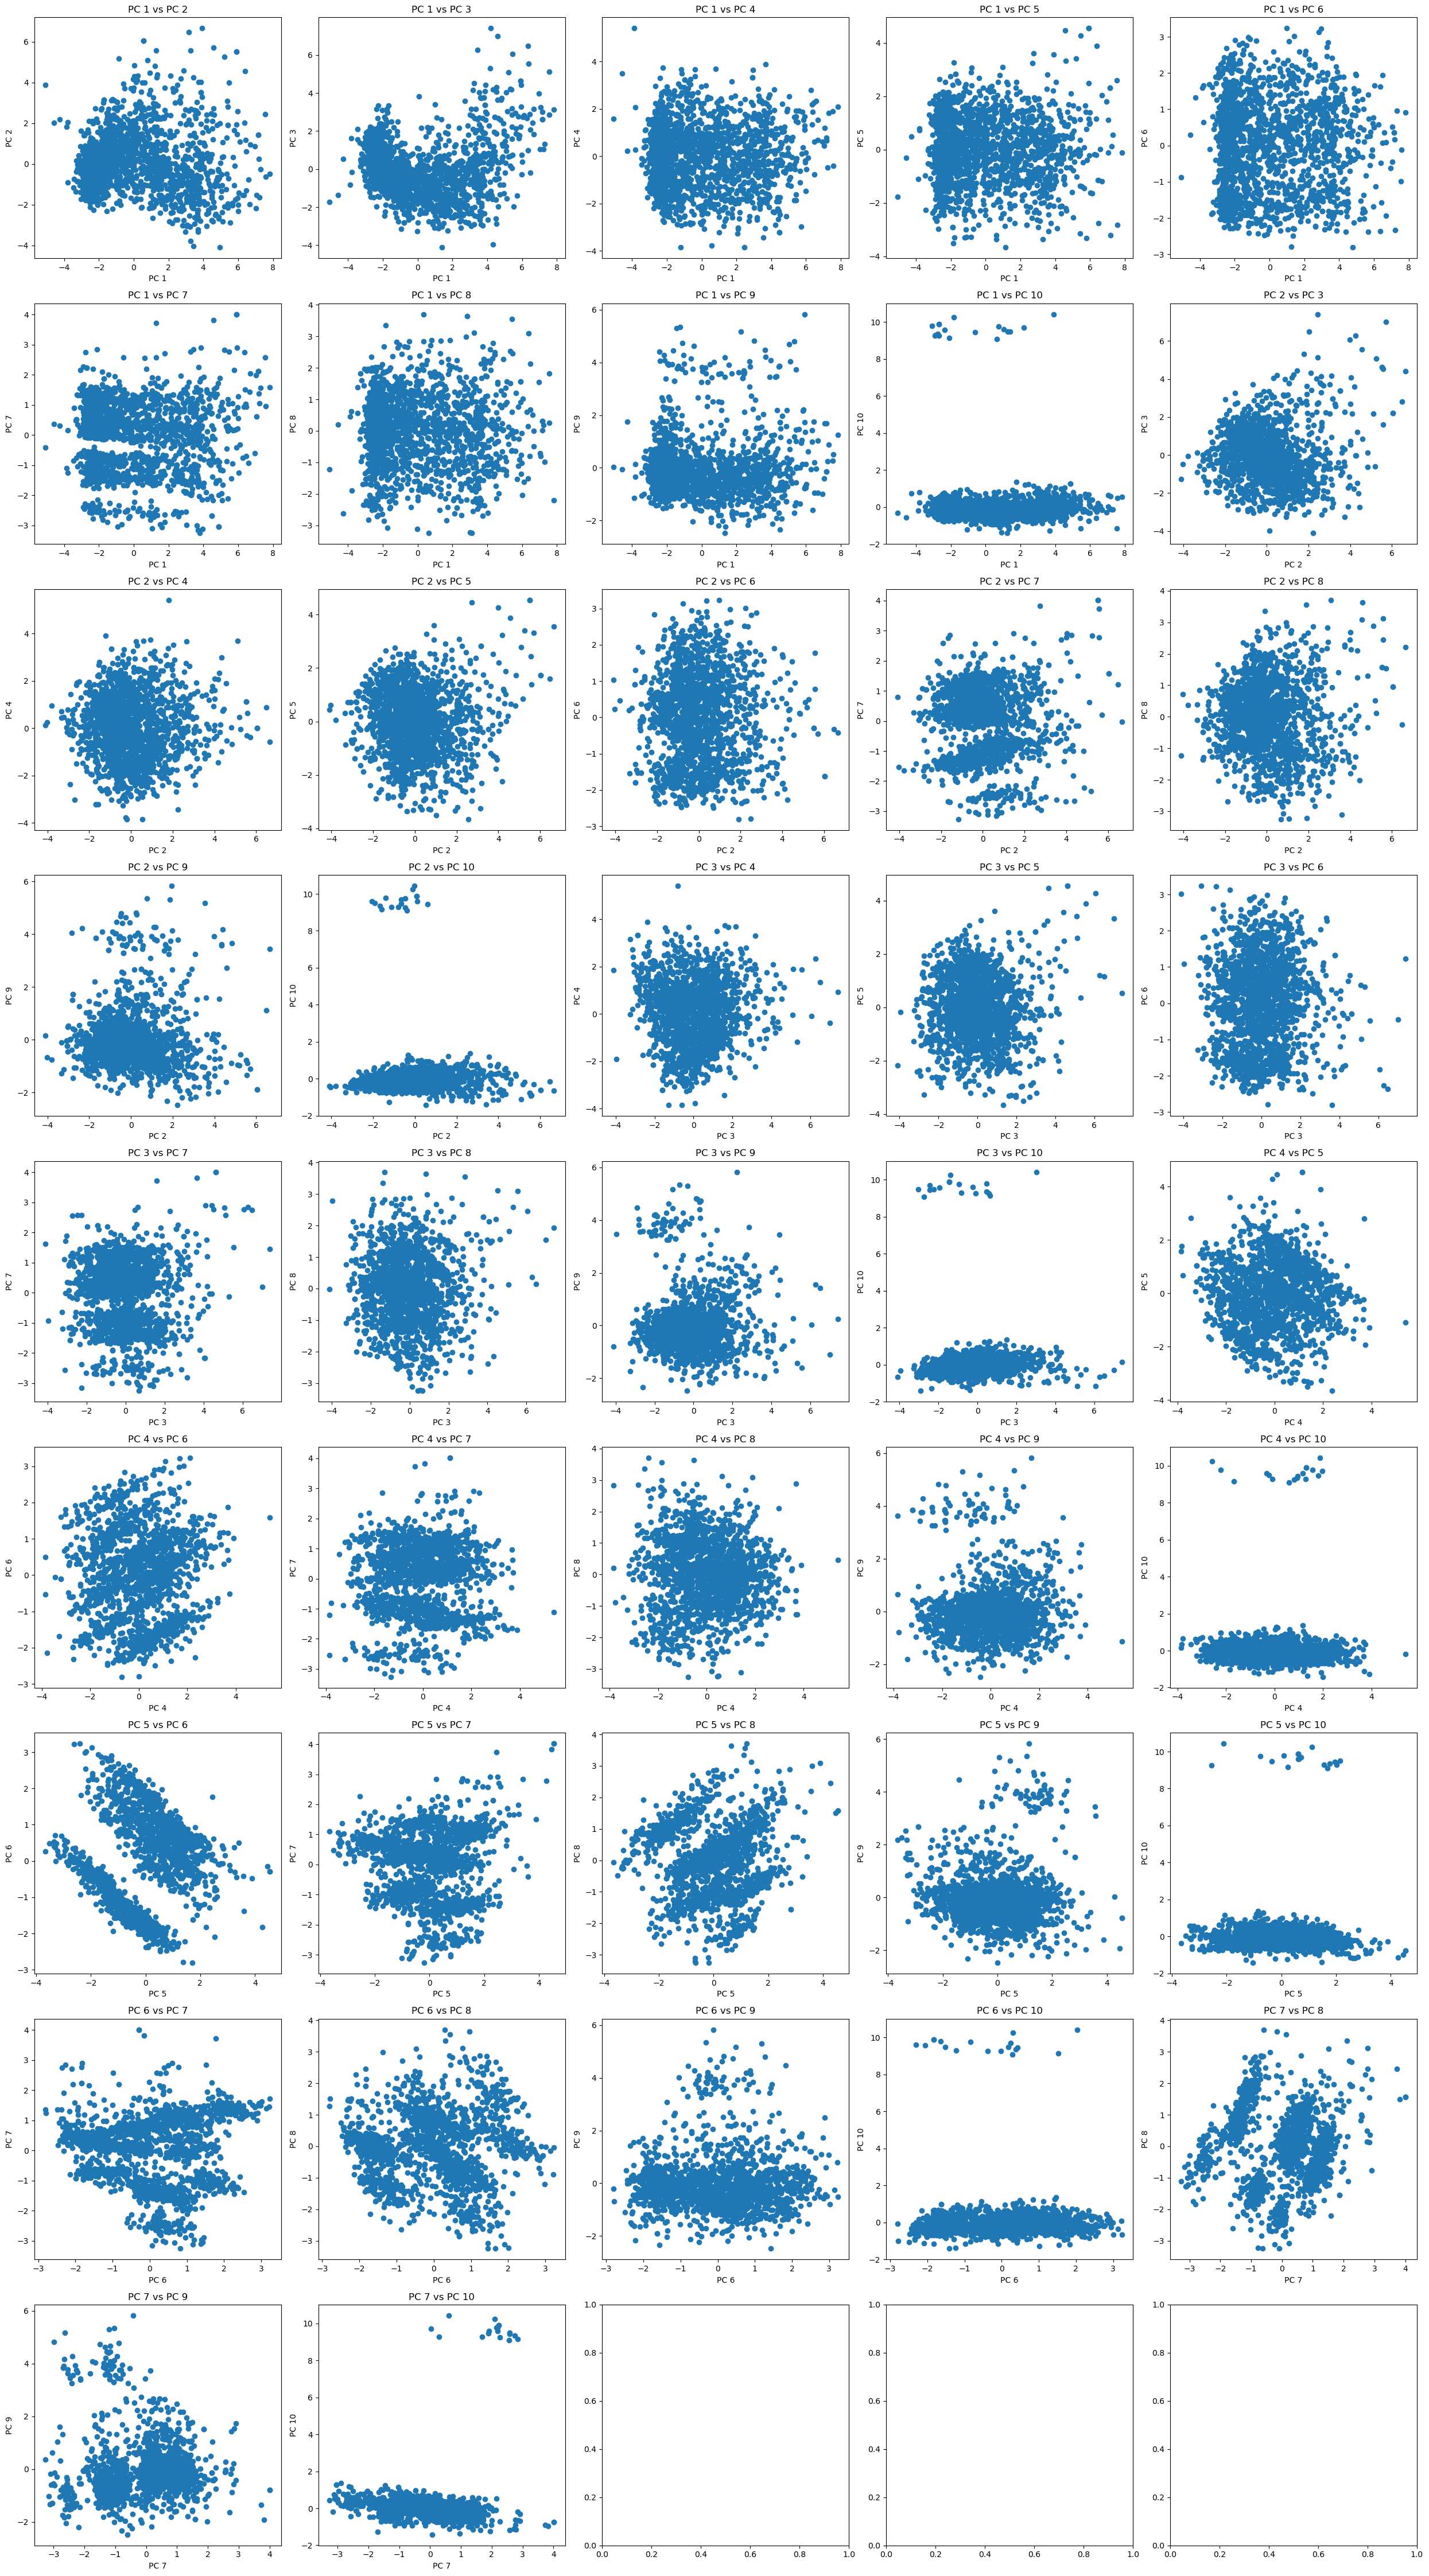

In [10]:
# visualize the principal components

rows = 9
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))

# Flatten axes for easy iteration (handles both 1D and 2D cases)
axes = np.array(axes).flatten()
index = 0

### We are cutting off the PCA components to 8 to avoid cluttering the plot

for i in range(0, 7):
    for j  in range(i+1, 10):
        ax = axes[index]
        ax.scatter(cpa_pca_selected_transformed[:, i], cpa_pca_selected_transformed[:, j])
        ax.set_xlabel('PC '+str(i+1))
        ax.set_ylabel('PC '+str(j+1))
        ax.set_title(f'PC {i+1} vs PC {j+1}')

        index += 1


plt.tight_layout()
# plt.suptitle('Scatter Plot of Principal Components for Top 8 Components of CPA Data') 

plt.show()

# # plt.scatter(spotify_pca_selected_transformed[:, 0], spotify_pca_selected_transformed[:, 1])
# # plt.xlabel('PC 1')
# # plt.ylabel('PC 2')
# plt.title('Scatter Plot of Principal Components')
# # plt.grid()

# plt.show()


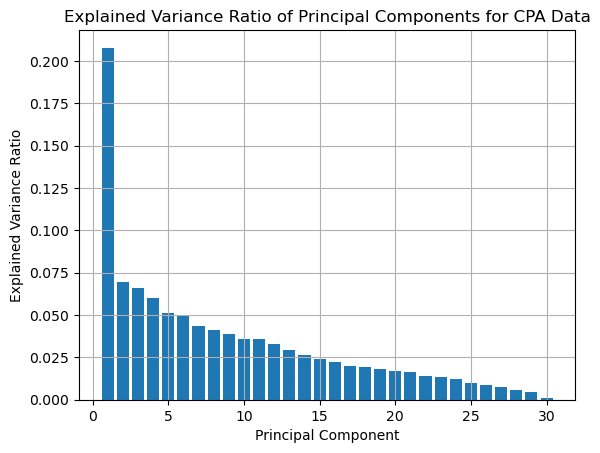

In [39]:
#PLot the explained variance ratio
plt.bar(range(1, len(explained_variance_selected_ratio) + 1), explained_variance_selected_ratio
)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components for CPA Data')
plt.grid()
plt.show()

*Findings*

Essentially we see that PC1 carry the most weight so the variables that make up those components carry the most weight as well.




In [40]:
cpa_columns = cpa_input_data.columns.tolist()
print(cpa_columns)

['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_Tenure', 'Customer_Age_Years', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow']


In [41]:
#create a dataframe for feature contributions
feature_contributions_selected_df  = pd.DataFrame(pca_selected.components_, columns=cpa_columns)


In [42]:

# Compute the absolute contributions of each feature to the first three principal components
top_features_pc1_selected = feature_contributions_selected_df.iloc[0].abs().sort_values(ascending=False)
top_features_pc2_selected = feature_contributions_selected_df.iloc[1].abs().sort_values(ascending=False)
top_features_pc3_selected = feature_contributions_selected_df.iloc[2].abs().sort_values(ascending=False)
top_features_pc4_selected = feature_contributions_selected_df.iloc[3].abs().sort_values(ascending=False)


In [43]:
top_features_pc1_selected.head()

Income                 0.337947
NumCatalogPurchases    0.322450
MntMeatProducts        0.322338
MntWines               0.308816
MntSweetProducts       0.280454
Name: 0, dtype: float64

In [44]:
print(top_features_pc1_selected)
print(top_features_pc2_selected)
print(top_features_pc3_selected)
print(top_features_pc4_selected)

Income                     0.337947
NumCatalogPurchases        0.322450
MntMeatProducts            0.322338
MntWines                   0.308816
MntSweetProducts           0.280454
MntFishProducts            0.279433
MntFruits                  0.274120
Kidhome                    0.256107
NumWebVisitsMonth          0.254617
MntGoldProds               0.221933
NumWebPurchases            0.212338
AcceptedCmp5               0.209784
AcceptedCmp1               0.179838
Response                   0.131826
AcceptedCmp4               0.097664
NumDealsPurchases          0.069288
AcceptedCmp2               0.068621
Teenhome                   0.065721
Customer_Age_Years         0.058663
Marital_Status_Widow       0.035897
Customer_Tenure            0.035465
AcceptedCmp3               0.031631
Education_Graduation       0.029391
Education_Master           0.020569
Marital_Status_Married     0.015848
Complain                   0.014159
Education_PhD              0.007782
Recency                    0

##### Reduce the number of Features for CPA




In [ ]:
# Define a stricter threshold for low contribution
low_contribution_threshold = 0.25

# Identify features with consistently low contributions across the first 10 PCs
low_contributing_features = feature_contributions_selected_df.iloc[:10].abs().max().sort_values()
features_to_remove = low_contributing_features[low_contributing_features < low_contribution_threshold]

# List of features to retain
features_to_keep = [feature for feature in cpa_columns if feature not in features_to_remove.index]


In [ ]:
print(features_to_remove)

print('features to keep:' + str(features_to_keep))


Series([], dtype: float64)
features to keep:['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_Tenure', 'Customer_Age_Years', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow']


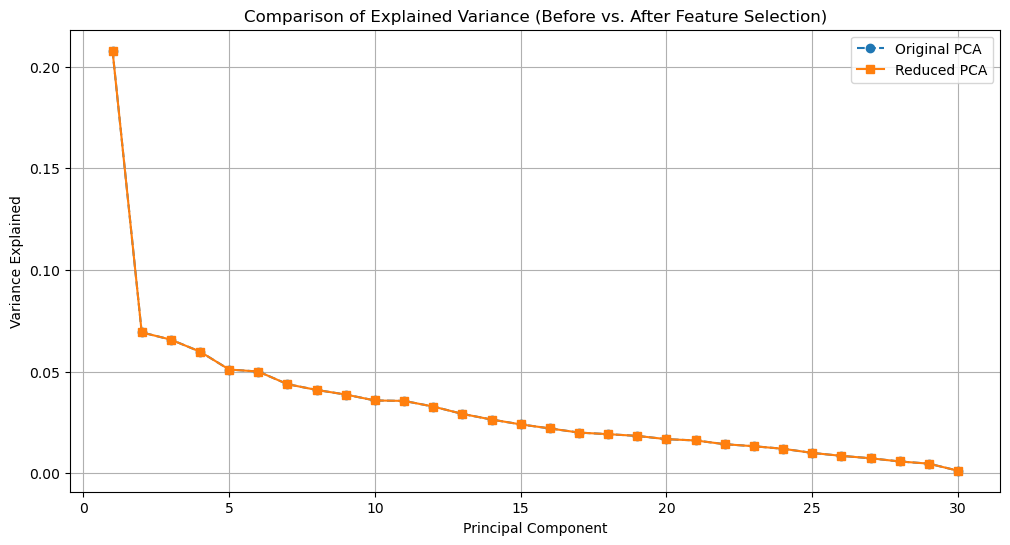

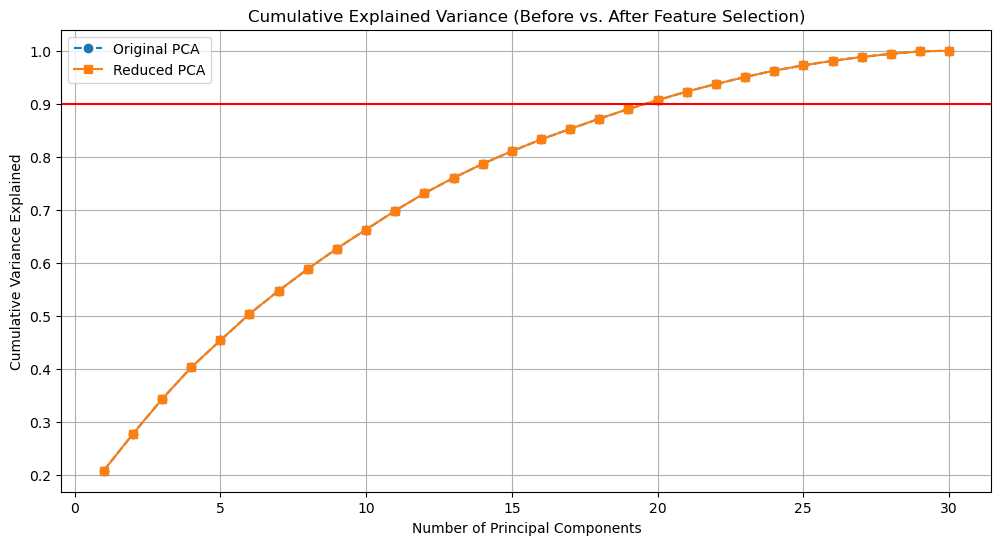

In [47]:
# Extract only the retained features for PCA
cpa_reduced_df = cpa_input_data[features_to_keep]

# Standardize the reduced dataset
cpa_reduced_scaled = scaler.fit_transform(cpa_reduced_df)

# Split the reduced dataset into training and test sets
cpa_reduced_train, cpa_reduced_test = train_test_split(cpa_reduced_scaled, test_size=0.2, random_state=30)

# Apply PCA on reduced dataset
pca_reduced = PCA()
cpa_pca_reduced_transformed = pca_reduced.fit_transform(cpa_reduced_train)

# Extract explained variance for comparison
explained_variance_original = pca_selected.explained_variance_ratio_
explained_variance_reduced = pca_reduced.explained_variance_ratio_

# Create a comparison plot for explained variance
plt.figure(figsize=(12, 6))

plt.plot(range(1, len(explained_variance_original) + 1), explained_variance_original, marker='o', linestyle='--', label='Original PCA')
plt.plot(range(1, len(explained_variance_reduced) + 1), explained_variance_reduced, marker='s', linestyle='-', label='Reduced PCA')

plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Comparison of Explained Variance (Before vs. After Feature Selection)')
plt.legend()
plt.grid()
plt.show()

# Compute cumulative variance for both cases
cumulative_variance_original = np.cumsum(explained_variance_original)
cumulative_variance_reduced = np.cumsum(explained_variance_reduced)

# Plot cumulative explained variance
plt.figure(figsize=(12, 6))

plt.plot(range(1, len(cumulative_variance_original) + 1), cumulative_variance_original, marker='o', linestyle='--', label='Original PCA')
plt.plot(range(1, len(cumulative_variance_reduced) + 1), cumulative_variance_reduced, marker='s', linestyle='-', label='Reduced PCA')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Explained Variance (Before vs. After Feature Selection)')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.legend()
plt.grid()
plt.show()


Findings:

Essentially we are only able to remove a single feature from our original dataset but moving forward when we do the nueral net training, we will only use the first 20 PCA components rather than 30 components which is what the initial feature was sized as. 

### ICA Analysis


#### Code from TA Office Hours

In [48]:
cpa_input_data.head()
features = ['Income', 'Customer_Age_Years','Customer_Tenure']
cpa_ICA_inputs = cpa_input_data[features]


In [49]:
scaler = StandardScaler()
cpa_ICA_scaled = scaler.fit_transform(cpa_ICA_inputs)

# Split the dataset into training and test sets
cpa_ICA_train, cpa_ICA_test = train_test_split(cpa_ICA_scaled, test_size=0.2, random_state=30)

# Apply PCA
cpa_ICA = FastICA(n_components=2)
independent_components = cpa_ICA.fit_transform(cpa_ICA_train)


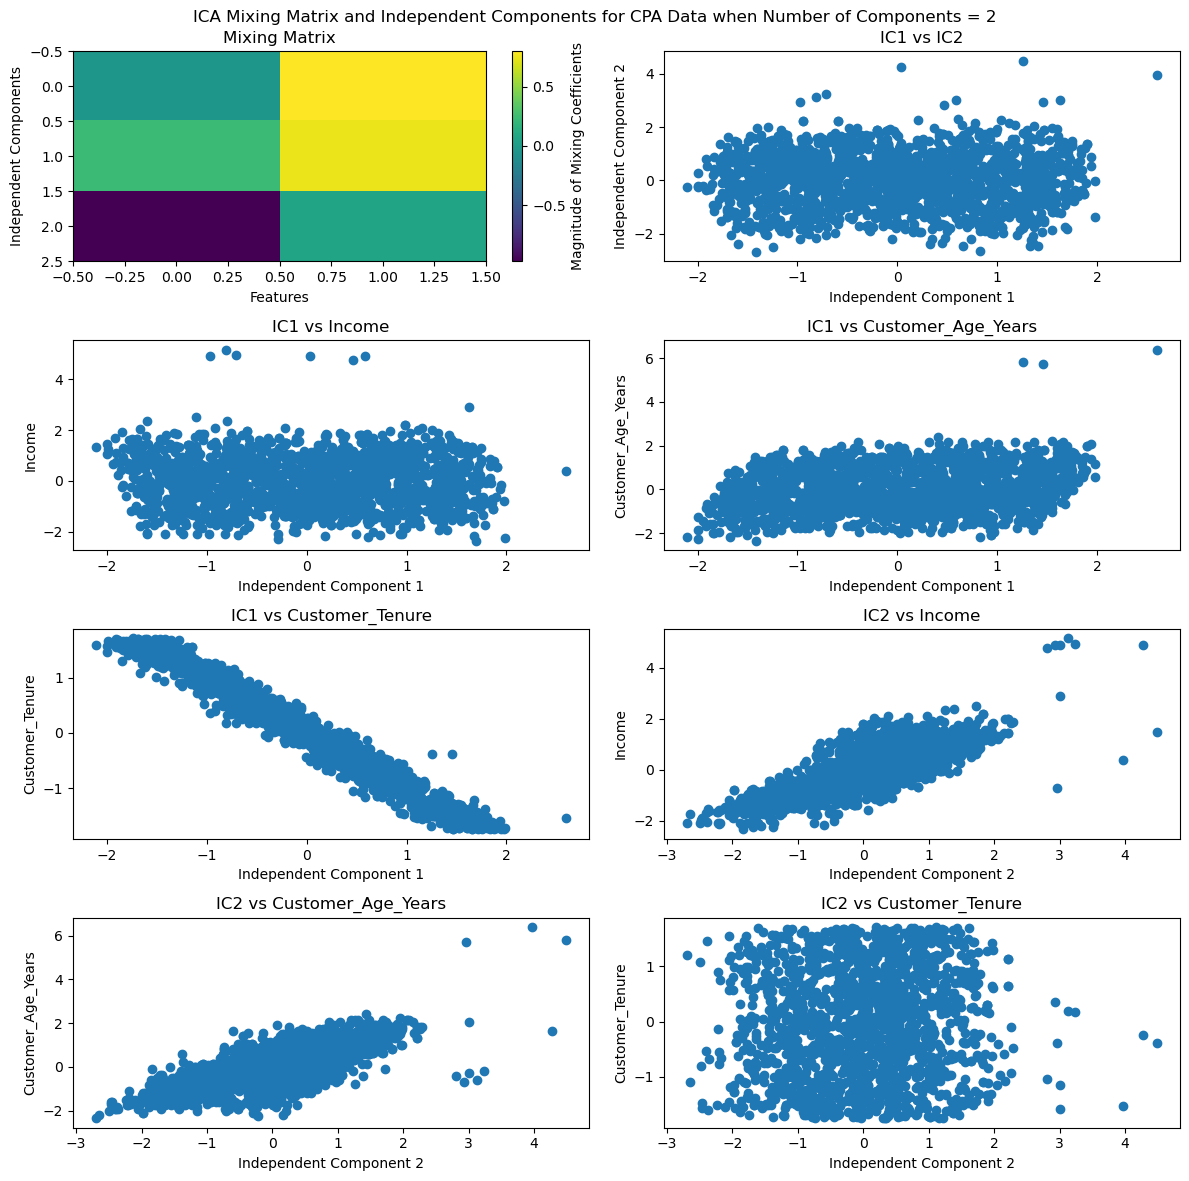

In [50]:
#Create a 4 by 2 grid
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(4, 2, figure=fig)

#define subsplots
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

#Add mixing matrix as the first plot
cax = ax0.imshow(cpa_ICA.mixing_, cmap='viridis', aspect='auto')
ax0.set_title('Mixing Matrix')
ax0.set_xlabel('Features')
ax0.set_ylabel('Independent Components')

#Add a color bar
cbar = fig.colorbar(cax, ax=ax0)
cbar.set_label('Magnitude of Mixing Coefficients')

#Add the IC1 vs IC2 plots for the second plot

ax1.scatter(independent_components[:, 0], independent_components[:, 1])
ax1.set_xlabel('Independent Component 1')
ax1.set_ylabel('Independent Component 2')
ax1.set_title('IC1 vs IC2')

#Define remaining plots for IC1 and IC2 vs features
features = ['Income', 'Customer_Age_Years','Customer_Tenure']

for i, feature in enumerate(features):
    ax = fig.add_subplot(gs[(i+2) //2,(i+2) % 2])
    ax.scatter( independent_components[:, 0],cpa_ICA_train[:, i])
    ax.set_ylabel(feature)
    ax.set_xlabel('Independent Component 1')
    ax.set_title(f'IC1 vs {feature}')

    ax = fig.add_subplot(gs[(i+5)//2, (i+ 5) % 2])
    ax.scatter(independent_components[:, 1],cpa_ICA_train[:, i])
    ax.set_ylabel(feature)
    ax.set_xlabel('Independent Component 2')
    ax.set_title(f'IC2 vs {feature}')


fig.suptitle('ICA Mixing Matrix and Independent Components for CPA Data when Number of Components = 2') 

plt.tight_layout()

plt.show()

#### focusing on all components

In [51]:
cpa_input_data.head()



,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Response,Customer_Tenure,Customer_Age_Years,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,663,55,True,False,False,False,True,False,False
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,113,60,True,False,False,False,True,False,False
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,312,48,True,False,False,False,False,True,False
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,139,30,True,False,False,False,False,True,False
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,161,33,False,False,True,True,False,False,False


In [52]:

print(cpa_columns)


['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_Tenure', 'Customer_Age_Years', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow']


In [53]:

cpa_selected_df = cpa_input_data[cpa_columns].dropna()  # Dropping missing values

# Standardizing the features
scaler = StandardScaler()
cpa_scaled_df = scaler.fit_transform(cpa_selected_df)

# Split into training and test sets
cpa_full_ICA_train, cpa_full_ICA_test = train_test_split(cpa_scaled_df, test_size=0.2, random_state=30)

# Applying ICA
n_components = min(cpa_full_ICA_train.shape[0], cpa_full_ICA_train.shape[1])  # Ensuring we do not exceed dimensions
# cpa_full_ica = FastICA(n_components=n_components, random_state=30)
cpa_full_ica = FastICA(random_state=30)

cpa_full_ica_df = cpa_full_ica.fit_transform(cpa_full_ICA_train)

# Convert to DataFrame
cpa_full_ica_df = pd.DataFrame(cpa_full_ica_df, columns=[f'IC{i+1}' for i in range(n_components)])


# Compute kurtosis for each independent component
kurtosis_values = cpa_full_ica_df.apply(stats.kurtosis)



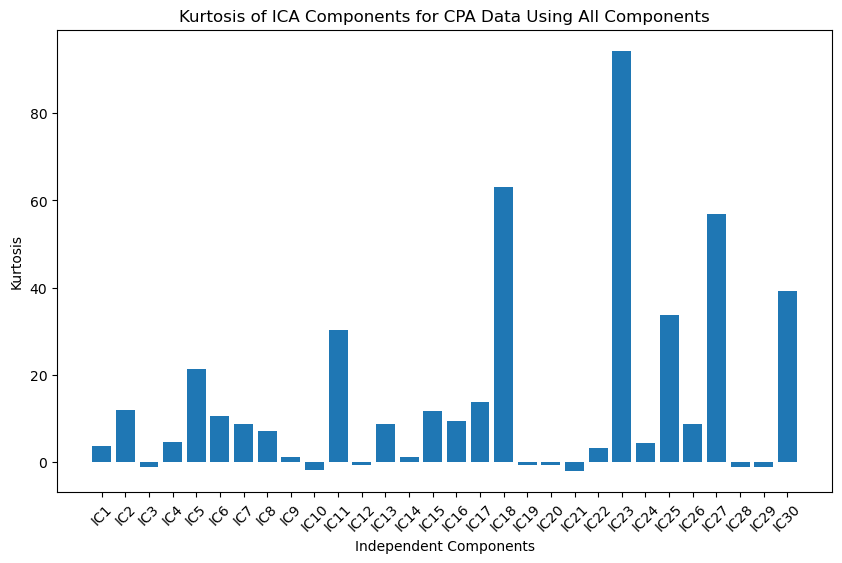

In [54]:

# Plot kurtosis values
plt.figure(figsize=(10, 6))
plt.bar(kurtosis_values.index, kurtosis_values.values)
plt.xlabel("Independent Components")
plt.ylabel("Kurtosis")
plt.title("Kurtosis of ICA Components for CPA Data Using All Components")
plt.xticks(rotation=45)
plt.show()


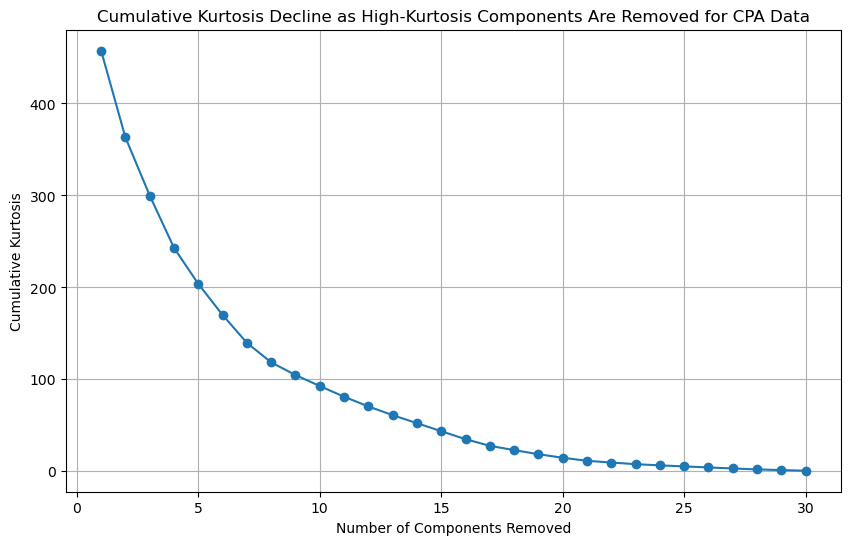

In [55]:
# Compute cumulative kurtosis by removing highest kurtosis components one by one
sorted_kurtosis = kurtosis_values.abs().sort_values(ascending=False)
cumulative_kurtosis = [sorted_kurtosis.sum()]

for i in range(1, len(sorted_kurtosis)):
    cumulative_kurtosis.append(sorted_kurtosis.iloc[i:].sum())

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_kurtosis) + 1), cumulative_kurtosis, marker="o", linestyle="-")
plt.xlabel("Number of Components Removed")
plt.ylabel("Cumulative Kurtosis")
plt.title("Cumulative Kurtosis Decline as High-Kurtosis Components Are Removed for CPA Data")
plt.grid(True)
plt.show()

In [56]:
# Compute the sorted indices based on absolute kurtosis values (descending order)
sorted_indices = np.argsort(-np.abs(kurtosis_values))

# Compute cumulative kurtosis in sorted order
cumulative_kurtosis_sorted = [np.abs(kurtosis_values.iloc[sorted_indices]).sum()]
for i in range(1, len(sorted_indices)):
    cumulative_kurtosis_sorted.append(np.abs(kurtosis_values.iloc[sorted_indices[i:]]).sum())




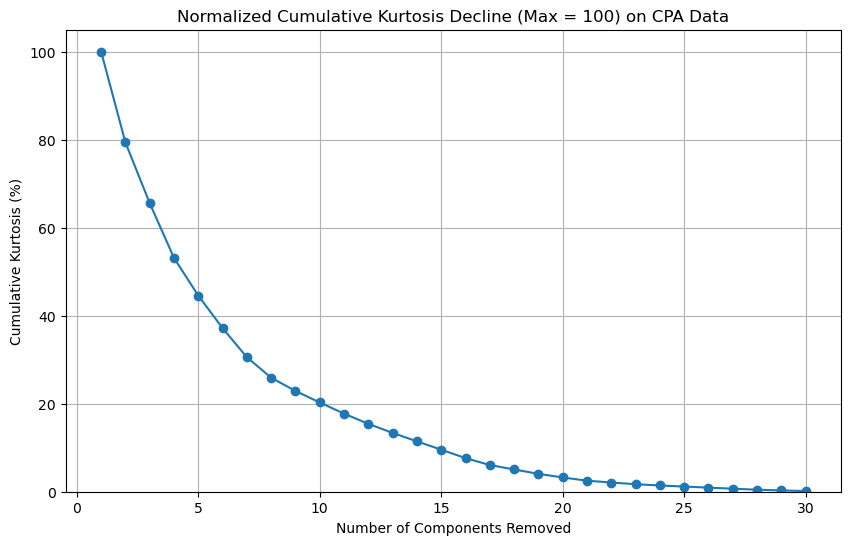

In [57]:
# Normalize cumulative kurtosis so the maximum value is 100
cumulative_kurtosis_normalized = (np.array(cumulative_kurtosis_sorted) / cumulative_kurtosis_sorted[0]) * 100

# Create normalized plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_kurtosis_normalized) + 1), cumulative_kurtosis_normalized, marker="o", linestyle="-")
plt.xlabel("Number of Components Removed")
plt.ylabel("Cumulative Kurtosis (%)")
plt.title("Normalized Cumulative Kurtosis Decline (Max = 100) on CPA Data")
plt.grid(True)
plt.ylim(0, 105)  # Ensure the y-axis goes from 0 to slightly above 100 for clarity
plt.show()


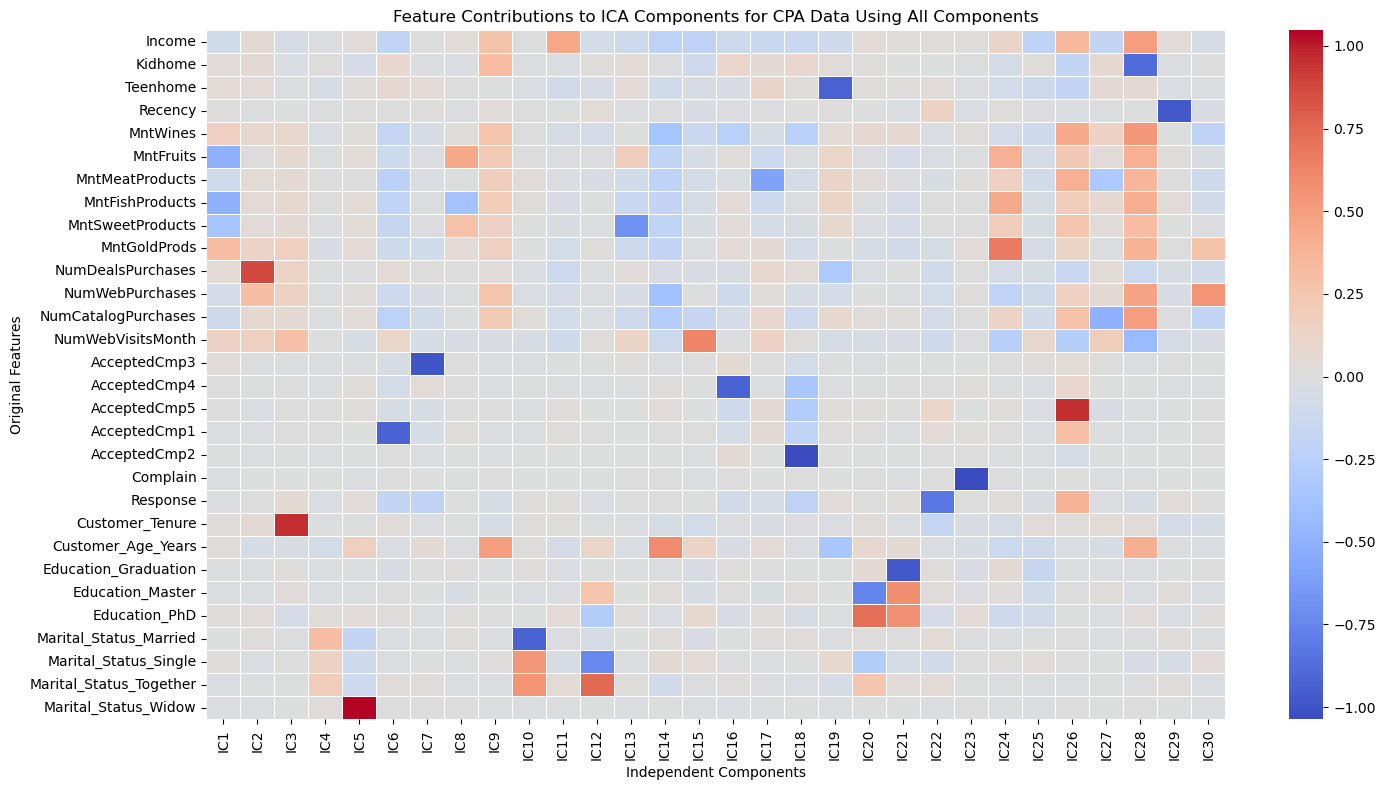

In [58]:


# Extract ICA mixing matrix (A)
mixing_matrix = cpa_full_ica.mixing_

# Create DataFrame for visualization
mixing_df = pd.DataFrame(mixing_matrix, 
                         index=cpa_columns, 
                         columns=[f'IC{i+1}' for i in range(n_components)])

# # Display the feature contributions to each IC
# tools.display_dataframe_to_user(name="Feature Contributions to ICA Components", dataframe=mixing_df)

# Heatmap for better visualization
plt.figure(figsize=(15, 8))
sns.heatmap(mixing_df, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Contributions to ICA Components for CPA Data Using All Components")
plt.xlabel("Independent Components")
plt.ylabel("Original Features")
plt.tight_layout()
plt.show()


### Random Projections

In [59]:
cpa_scaled_df 


cpa_full_RP_train, cpa_full_RP_test = train_test_split(cpa_scaled_df, test_size=0.2, random_state=30)



# Define target dimensions to test
target_dimensions = list(range(2, 30))  # From 2 to 30 dimensions

# Apply Randomized Projections and Compute Reconstruction Error 
results = []

for dim in target_dimensions:
    # Apply Randomized Projections with inverse components computation
    rp = GaussianRandomProjection(n_components=dim, compute_inverse_components=True, random_state=30)
    cpa_rp_transformed = rp.fit_transform(cpa_full_RP_train)

    # Reconstruct the original space using the learned inverse transform
    cpa_rp_reconstructed = rp.inverse_transform(cpa_rp_transformed)

    # Compute reconstruction error (Frobenius norm)
    rp_reconstruction_error = np.linalg.norm(cpa_full_RP_train - cpa_rp_reconstructed, ord='fro')

    # Store results
    results.append([dim, rp_reconstruction_error])

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=["Target Dimensions", "RP Reconstruction Error"])



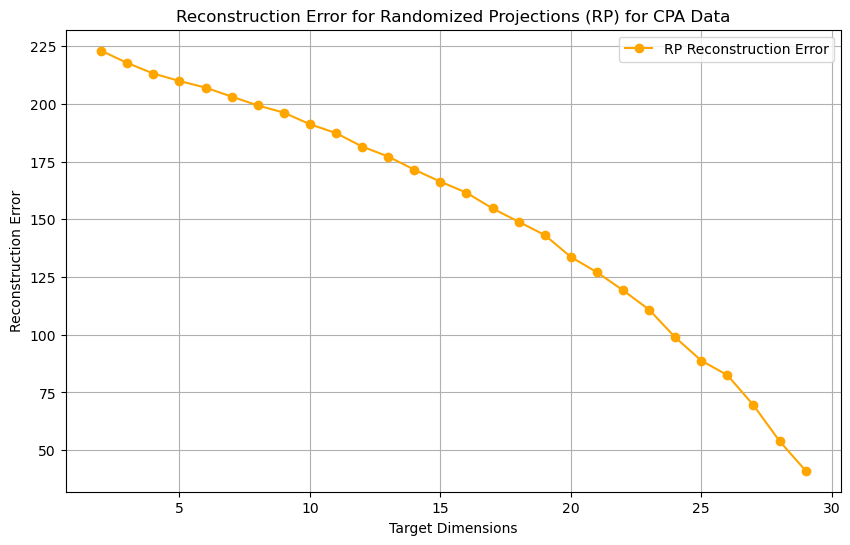

In [60]:


plt.figure(figsize=(10, 6))
plt.plot(target_dimensions, results_df["RP Reconstruction Error"], marker='o', linestyle='-', color='orange', label="RP Reconstruction Error")
plt.xlabel("Target Dimensions")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error for Randomized Projections (RP) for CPA Data")
plt.grid()
plt.legend()
plt.show()

##### Results of RP


It would appear that RP seems to prefer is I continue to add dimensions all the way to 30. The best way to test the differences will be to use the different outputs of my model to see if a smaller set of compenents leads to improved performance of my Neural net.

## Apply Clustering


### Apply Clustering to PCA Dataset

In [61]:
import warnings
warnings.filterwarnings("ignore")

import os 
os.environ['OMP_NUM_THREADS'] = '7'

In [62]:
### We will start with 20 PCA diemnsions because that hit the 90% cutoff earlier in our code
# Apply PCA
optimal_dimensions = 20  # Optimal dimensions based on PCA analysis from earlier
pca_final = PCA(n_components=optimal_dimensions)
cpa_20_dims_pca_transformed = pca_final.fit_transform(cpa_train)




# Determine optimal number of clusters using Elbow Method and Silhouette Score
pca_inertia = []
pca_silhouette_scores = []
pca_kmeans_silhouette = []
pca_kmeans_db = []
pca_k_values = range(2, 50)

for k in pca_k_values:
    kmeans = KMeans(n_clusters=k, random_state=30, n_init=15)
    kmeans.fit(cpa_20_dims_pca_transformed)
    pca_inertia.append(kmeans.inertia_)
    pca_silhouette_scores.append(silhouette_score(cpa_20_dims_pca_transformed, kmeans.labels_))
    # Evaluate clustering performance
    kmeans_labels = kmeans.fit_predict(cpa_20_dims_pca_transformed)
    pca_kmeans_db.append(davies_bouldin_score(cpa_20_dims_pca_transformed, kmeans_labels))


### Adding the training and score calculating adds more time to the code. It increases the run time from 17 sceonds to 37seconds


In [63]:
# Create DataFrame for BIC, AIC, and Log-Likelihood
pca_k_means_scores_df = pd.DataFrame({'Clusters': pca_k_values, 'Intertia': pca_inertia, 'Silhouette Scores': pca_silhouette_scores, 'Davies Bouldin': pca_kmeans_db})
pca_k_means_scores_df.head()

,Clusters,Intertia,Silhouette Scores,Davies Bouldin
0,2,40435.016163,0.208922,2.040891
1,3,37702.666357,0.125536,2.465606
2,4,35578.890713,0.131307,2.381261
3,5,34200.424296,0.086964,2.292066
4,6,32145.606615,0.143426,1.908499


<Figure size 1200x500 with 0 Axes>

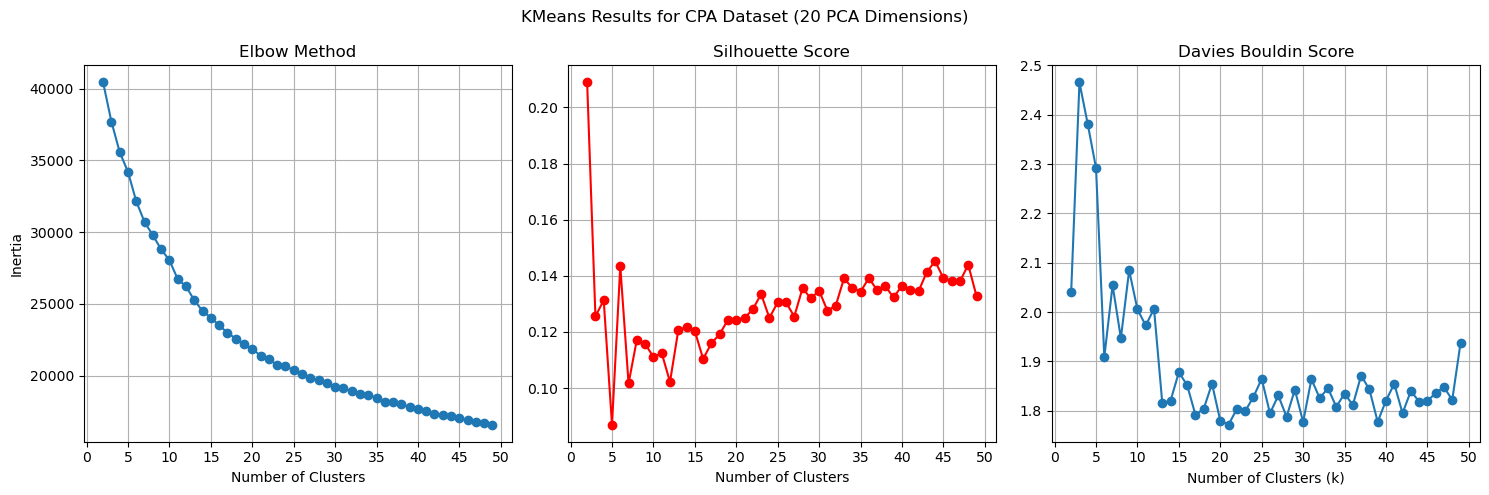

In [64]:

# Plot Elbow Method
plt.figure(figsize=(12,5))

# plt.subplot(1, 2, 1)
fig1, axs = plt.subplots(1, 3)

fig1.suptitle('KMeans Results for CPA Dataset (20 PCA Dimensions)')

axs[0].plot(pca_k_values, pca_inertia, marker='o')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Inertia')
axs[0].set_title('Elbow Method')
axs[0].set_xticks(range(0, 51, 5))
axs[0].grid()

# axs[0].set_xticks(k_values)

# Plot Silhouette Scores
# plt.subplot(1, 2, 2)
axs[1].plot(pca_k_values, pca_silhouette_scores, marker='o', color='red')
axs[1].set_xlabel('Number of Clusters')
# axs[1].set_ylabel('Silhouette Score')
axs[1].set_title('Silhouette Score')
axs[1].set_xticks(range(0, 51, 5))
axs[1].grid()

# axs[1].set_xticks(k_values)
fig1.set_figheight(5)
fig1.set_figwidth(15)
plt.tight_layout()

# fig1.tight_layout()
# fig1.subplots_adjust(top=0.88)

# Plot Davis Boudlin Method
# plt.figure(figsize=(10, 5))
axs[2].plot(pca_k_values, pca_kmeans_db, marker='o', linestyle='-')
axs[2].set_xlabel("Number of Clusters (k)")
# axs[2].set_ylabel("Davies Bouldin Score")
axs[2].set_title("Davies Bouldin Score")
axs[2].set_xticks(range(0, 51, 5))
# axs[2].set_ylim(0, 2.5)
axs[2].grid()
# plt.legend()
# plt.show()
plt.tight_layout()

plt.show()


In [65]:
# # Plot Davis Boudlin Method
# plt.figure(figsize=(10, 5))
# plt.plot(pca_k_values, pca_kmeans_db, marker='o', linestyle='-')
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Davies Bouldin Score")
# plt.title("Davies Bouldin Score for Optimal k for CPA 20 Dimension PCA")
# plt.xticks(range(0, 51, 5))
# plt.grid()
# plt.legend()
# plt.show()

#### Results for K Means on 20 PCA

We get that 5 groups is our best cluster performance

In [66]:
# Determine optimal number of clusters using GMM (BIC/AIC)
cpa_20_dim_bic_scores = []
cpa_20_dim_aic_scores = []



# cpa_gmm_inertia = []
# cpa_gmm_silhouette_scores =[]

k_values = range(2, 50)


pca_gmm_silhouette = []
pca_gmm_db = []
cpa_20_dim_log_likelihoods = []

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=30)
    gmm.fit(cpa_20_dims_pca_transformed)
    cpa_20_dim_bic_scores.append(gmm.bic(cpa_20_dims_pca_transformed))
    cpa_20_dim_aic_scores.append(gmm.aic(cpa_20_dims_pca_transformed))
    cpa_20_dim_log_likelihoods.append(gmm.score(cpa_20_dims_pca_transformed))
    # cpa_gmm_inertia.append(gmm.inertia_)
    # cpa_gmm_silhouette_scores.append(silhouette_score(X_train, gmm.labels_))
    cpa_gmm_labels = gmm.fit_predict(cpa_20_dims_pca_transformed)
    # Evaluate clustering performance
    pca_gmm_silhouette.append(silhouette_score(cpa_20_dims_pca_transformed, cpa_gmm_labels))
    pca_gmm_db.append(davies_bouldin_score(cpa_20_dims_pca_transformed, cpa_gmm_labels))


### add in the evaluation metrics for the GMM like Davies Bouldin and Silhouette Score
### Then graph those results

In [67]:
# # Plot Silhouette Scores
# plt.figure(figsize=(10, 6))
# # plt.subplot(1, 3, 1)
# # plt.suptitle('BIC, AIC, and Log Likelihood Scores for GMM on CPA 20 PCA Dimensions', fontsize=16)
# plt.plot(k_values, pca_gmm_silhouette, marker='o', color='blue')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score for GMM on CPA 20 PCA Dimensions')
# plt.xticks(range(0, 51, 5))

# # plt.ylabel('BIC Score')
# # plt.title('BIC Score', fontsize=14)
# plt.tight_layout()
# plt.grid()
# plt.show()

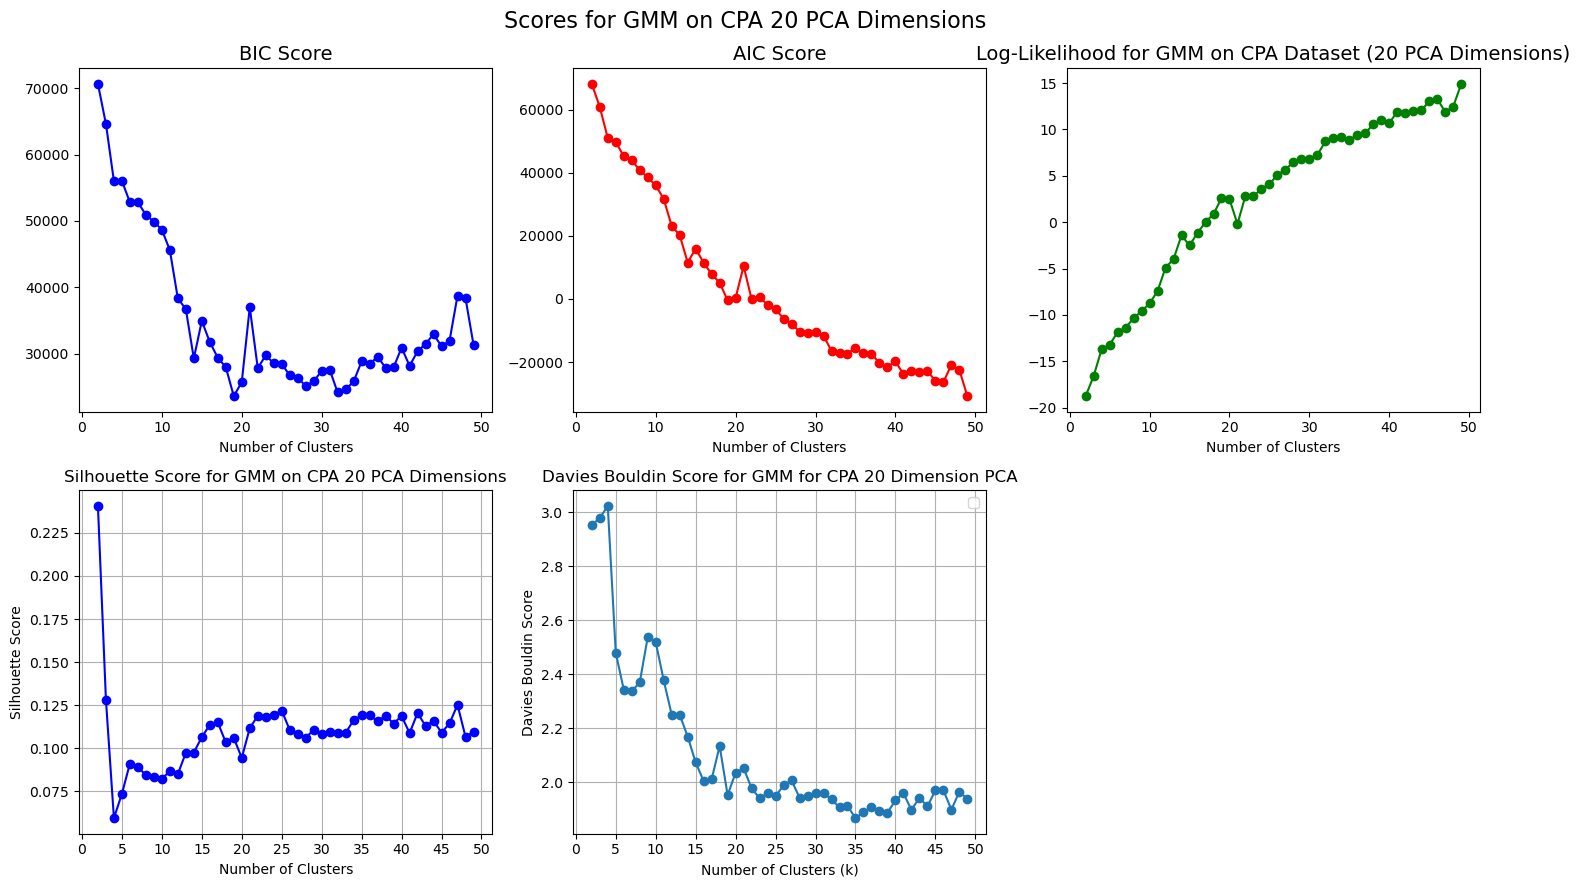

In [68]:

# Plot BIC and AIC Scores
plt.figure(figsize=(15, 9))
plt.subplot(2, 3, 1)
plt.suptitle('Scores for GMM on CPA 20 PCA Dimensions', fontsize=16)
plt.plot(k_values, cpa_20_dim_bic_scores, marker='o', color='blue')
plt.xlabel('Number of Clusters')
# plt.ylabel('BIC Score')
plt.title('BIC Score', fontsize=14)
plt.tight_layout()
# plt.show()

plt.subplot(2, 3, 2)
plt.plot(k_values, cpa_20_dim_aic_scores, marker='o', color='red')
plt.xlabel('Number of Clusters')
# plt.ylabel('AIC Score')
plt.title('AIC Score', fontsize=14)
plt.tight_layout()

# plt.show()

# Plot Log-Likelihood
# plt.figure(figsize=(10, 4)) 
plt.subplot(2, 3, 3)
plt.plot(k_values, cpa_20_dim_log_likelihoods, marker='o', color='green')
plt.xlabel('Number of Clusters')
# plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood for GMM on CPA Dataset (20 PCA Dimensions)', fontsize=14)
plt.tight_layout() 
# plt.show()         

plt.subplot(2, 3, 4)
plt.plot(k_values, pca_gmm_silhouette, marker='o', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for GMM on CPA 20 PCA Dimensions')
plt.xticks(range(0, 51, 5))

# plt.ylabel('BIC Score')
# plt.title('BIC Score', fontsize=14)
plt.tight_layout()
plt.grid()
# plt.show()

plt.subplot(2, 3, 5)
plt.plot(pca_k_values, pca_gmm_db, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies Bouldin Score")
plt.title("Davies Bouldin Score for GMM for CPA 20 Dimension PCA")
plt.xticks(range(0, 51, 5))
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()


In [69]:
# # Plot Davis Boudlin Method
# plt.figure(figsize=(10, 5))
# plt.plot(pca_k_values, pca_gmm_db, marker='o', linestyle='-')
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Davies Bouldin Score")
# plt.title("Davies Bouldin Score for GMM for CPA 20 Dimension PCA")
# plt.xticks(range(0, 51, 5))
# plt.grid()
# plt.legend()
# plt.show()

### Clustering on ICA


In [70]:
ica = FastICA(n_components=15, random_state=30)  # Adjust `n_components` based on analysis
cpa_ica_transformed_df = ica.fit_transform(cpa_train)



# Determine optimal number of clusters using Elbow Method and Silhouette Score
ica_inertia = []
ica_silhouette_scores = []
ica_kmeans_silhouette = []
ica_kmeans_db = []
ica_k_values = range(2, 50)

for k in ica_k_values:
    kmeans = KMeans(n_clusters=k, random_state=30, n_init=15)
    kmeans.fit(cpa_ica_transformed_df)
    ica_inertia.append(kmeans.inertia_)
    ica_silhouette_scores.append(silhouette_score(cpa_ica_transformed_df, kmeans.labels_))
    # Evaluate clustering performance
    kmeans_labels = kmeans.fit_predict(cpa_ica_transformed_df)
    ica_kmeans_db.append(davies_bouldin_score(cpa_ica_transformed_df, kmeans_labels))


In [71]:
def evaluate_kmeans_clustering(X, k_range=range(2, 50), random_state=30, n_init=15):
    """
    Evaluates KMeans clustering using Elbow method (inertia),
    Silhouette Score, and Davies-Bouldin Score.

    Parameters:
    - X (DataFrame or ndarray): Feature matrix.
    - k_range (iterable): Range of k (number of clusters) to evaluate.
    - random_state (int): Random state for reproducibility.
    - n_init (int): Number of initializations for KMeans.

    Returns:
    - results (dict): Dictionary containing inertia, silhouette, and DB scores for each k.
    """
    inertia_scores = []
    silhouette_scores = []
    db_scores = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=n_init)
        kmeans.fit(X)
        labels = kmeans.labels_

        inertia_scores.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, labels))
        db_scores.append(davies_bouldin_score(X, labels))

    return {
        "k_values": list(k_range),
        "inertia": inertia_scores,
        "silhouette": silhouette_scores,
        "davies_bouldin": db_scores
    }


In [72]:

def plot_kmeans_scores(
    k_values,
    inertia,
    silhouette,
    db_scores,
    title="KMeans Results for CPA Dataset (15 ICA Dimensions)"
):
    """
    Plots KMeans evaluation metrics: Inertia (Elbow Method),
    Silhouette Score, and Davies-Bouldin Score.

    Parameters:
    - k_values (list): List of k (number of clusters).
    - inertia (list): Inertia values from KMeans.
    - silhouette (list): Silhouette scores from KMeans.
    - db_scores (list): Davies-Bouldin scores from KMeans.
    - title (str): Title for the entire figure.
    """
    fig, axs = plt.subplots(1, 3, figsize=(25, 8))
    fig.suptitle(title, fontsize=18)

    # Elbow Method (Inertia)
    axs[0].plot(k_values, inertia, marker='o')
    axs[0].set_xlabel('Number of Clusters', fontsize=16)
    axs[0].set_ylabel('Inertia', fontsize=16)
    axs[0].set_title('Elbow Method', fontsize=16)
    axs[0].set_xticks(range(0, max(k_values)+1, 5))
    axs[0].grid()
    axs[0].tick_params(axis='both', labelsize=16)

    # Silhouette Score
    axs[1].plot(k_values, silhouette, marker='o', color='red')
    axs[1].set_xlabel('Number of Clusters', fontsize=16)
    axs[1].set_title('Silhouette Score', fontsize=16)
    axs[1].set_xticks(range(0, max(k_values)+1, 5))
    axs[1].grid()
    axs[1].tick_params(axis='both', labelsize=16)

    # Davies-Bouldin Score
    axs[2].plot(k_values, db_scores, marker='o', linestyle='-')
    axs[2].set_xlabel('Number of Clusters', fontsize=16)
    axs[2].set_title('Davies Bouldin Score', fontsize=16)
    axs[2].set_xticks(range(0, max(k_values)+1, 5))
    axs[2].grid()
    axs[2].tick_params(axis='both', labelsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.95])

     # Save the figure as a PNG image in a folder
    folder_path = 'images/clustering_results/'
    ext =  '.png'
    file_name = f'{title}{ext}'
    plt.savefig(f'{folder_path}{file_name}')
    
    plt.show()


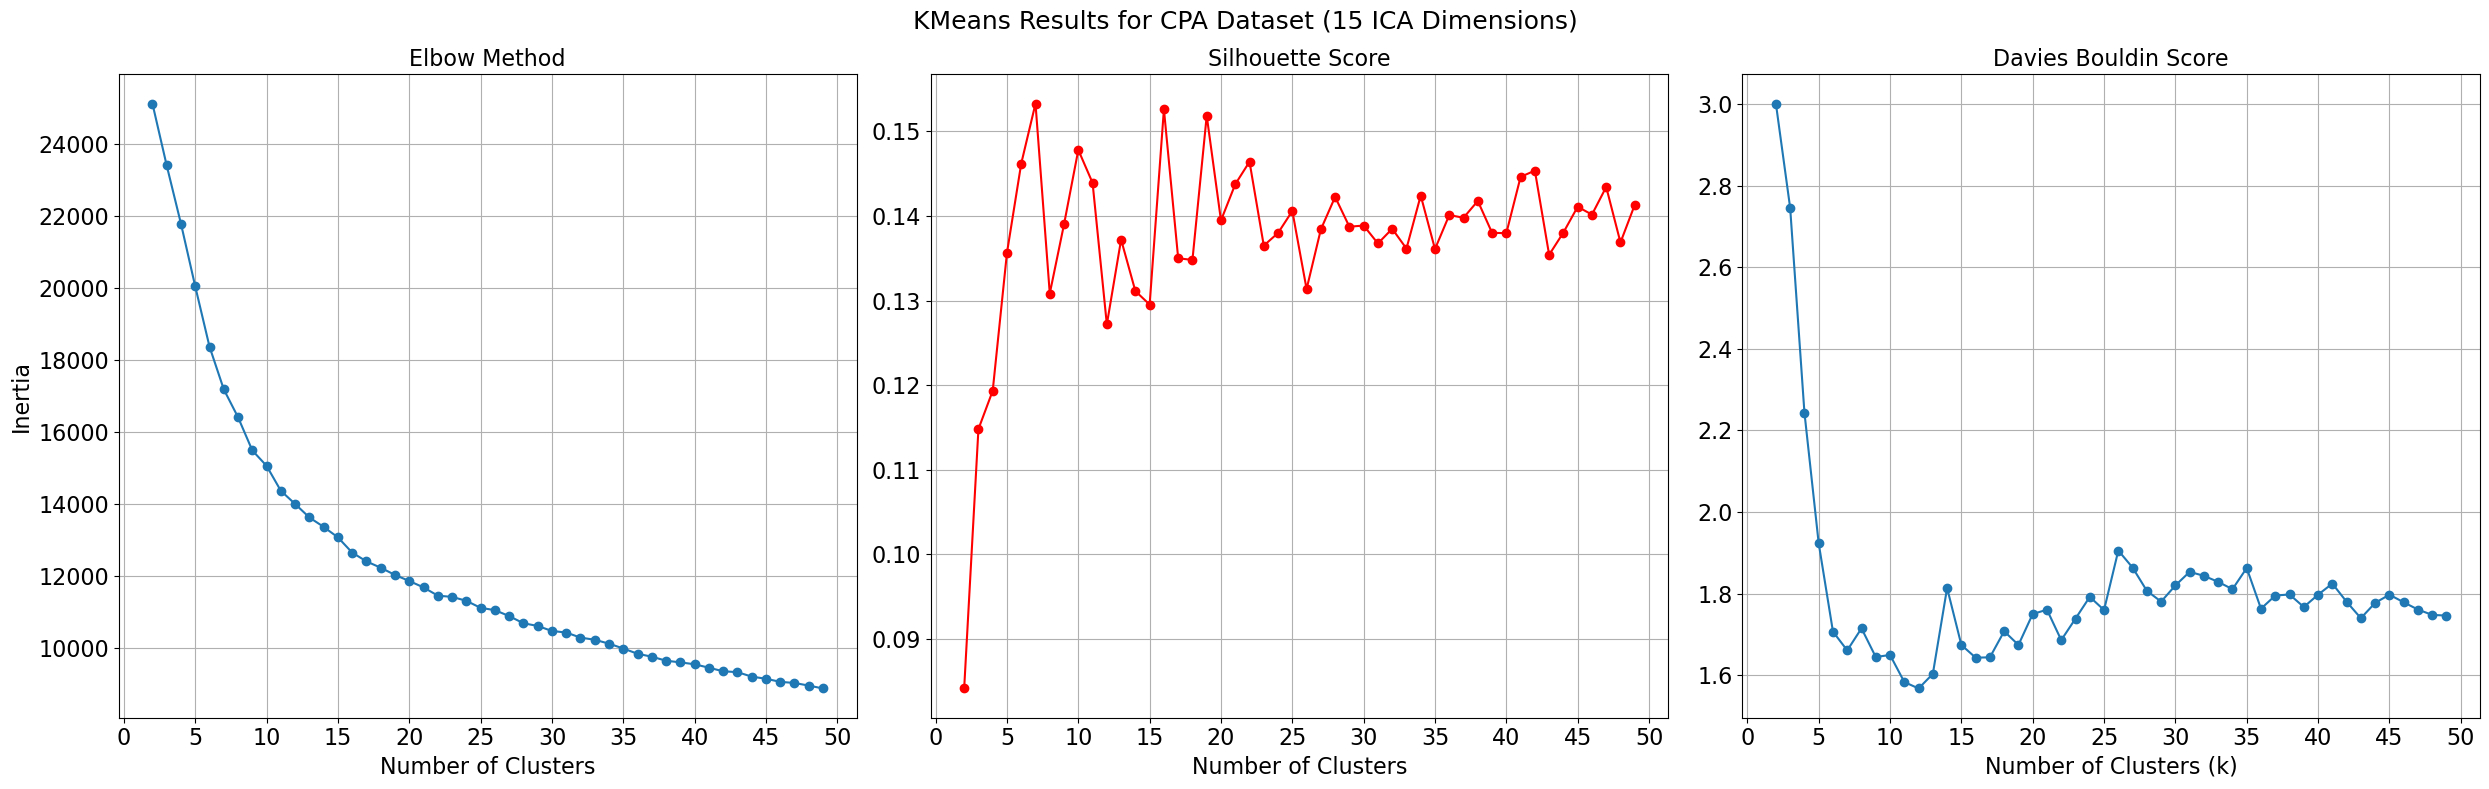

In [73]:

# Plot Elbow Method
# plt.figure(figsize=(15,8))

# plt.subplot(1, 2, 1)
fig1, axs = plt.subplots(1, 3)

fig1.suptitle('KMeans Results for CPA Dataset (15 ICA Dimensions)', fontsize=18)
fig1.set_figheight(8)
fig1.set_figwidth(25)

axs[0].plot(ica_k_values, ica_inertia, marker='o')
axs[0].set_xlabel('Number of Clusters', fontsize=16)
axs[0].set_ylabel('Inertia', fontsize=16)
axs[0].set_title('Elbow Method', fontsize=16)
axs[0].set_xticks(range(0, 51, 5))
axs[0].grid()
axs[0].tick_params(axis='both', labelsize=16)
# axs[0].set_xticks(fontsize=14)
# axs[0].set_yticks(fontsize=14)
# axs[0].text(fontsize=14)


# axs[0].set_xticks(k_values)

# Plot Silhouette Scores
# plt.subplot(1, 2, 2)
axs[1].plot(ica_k_values, ica_silhouette_scores, marker='o', color='red')
axs[1].set_xlabel('Number of Clusters', fontsize=16)
# axs[1].set_ylabel('Silhouette Score')
axs[1].set_title('Silhouette Score', fontsize=16)
axs[1].set_xticks(range(0, 51, 5))
axs[1].grid()
axs[1].tick_params(axis='both', labelsize=16)

# axs[1].set_xticks(fontsize=14)
# axs[1].set_yticks(fontsize=14)
# axs[1].text(fontsize=14)

# axs[1].set_xticks(k_values)

plt.tight_layout()
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

# fig1.tight_layout()
# fig1.subplots_adjust(top=0.88)

# Plot Davis Boudlin Method
# plt.figure(figsize=(10, 5))
axs[2].plot(ica_k_values, ica_kmeans_db, marker='o', linestyle='-')
axs[2].set_xlabel("Number of Clusters (k)", fontsize=16)
# axs[2].set_ylabel("Davies Bouldin Score")
axs[2].set_title("Davies Bouldin Score", fontsize=16)
axs[2].set_xticks(range(0, 51, 5))
# axs[2].set_ylim(0, 2.5)
axs[2].grid()
axs[2].tick_params(axis='both', labelsize=16)

# axs[2].set_xticks(fontsize=14)
# axs[2].set_yticks(fontsize=14)
# axs[2].text(fontsize=14)

# plt.legend()
# plt.show()
plt.tight_layout()


plt.show()


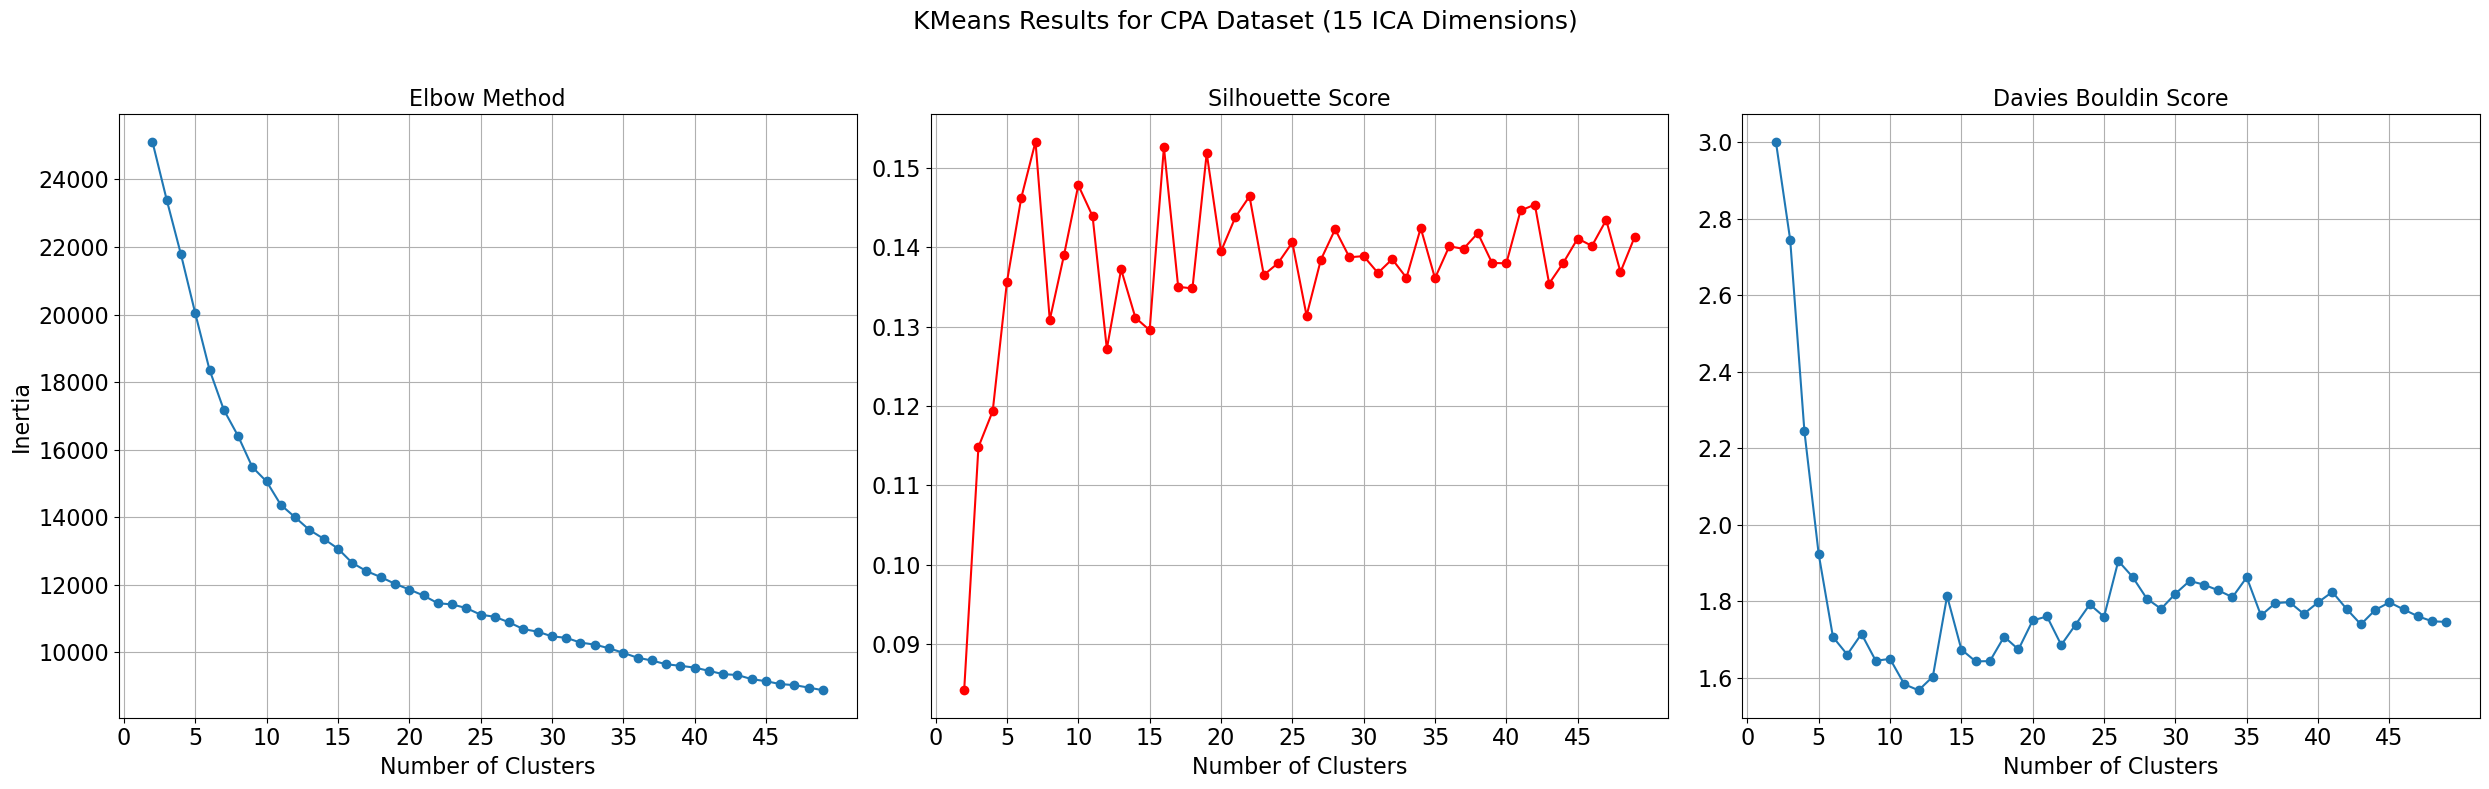

In [74]:
kmeans_results = evaluate_kmeans_clustering(cpa_ica_transformed_df)

plot_kmeans_scores(
    k_values=kmeans_results["k_values"],
    inertia=kmeans_results["inertia"],
    silhouette=kmeans_results["silhouette"],
    db_scores=kmeans_results["davies_bouldin"],
    title="KMeans Results for CPA Dataset (15 ICA Dimensions)"
)

In [75]:


def evaluate_gmm_clustering(X, k_range=range(2, 50), random_state=30):
    """
    Evaluates Gaussian Mixture Model clustering using BIC, AIC, log-likelihood,
    Silhouette Score, and Davies-Bouldin Score.

    Parameters:
    - X (DataFrame or ndarray): Feature matrix.
    - k_range (iterable): Range of k (number of clusters) to evaluate.
    - random_state (int): Random state for reproducibility.

    Returns:
    - results (dict): Dictionary containing BIC, AIC, log-likelihood, Silhouette,
                      and Davies-Bouldin scores for each k.
    """
    bic_scores = []
    aic_scores = []
    log_likelihoods = []
    silhouette_scores = []
    db_scores = []

    for k in k_range:
        gmm = GaussianMixture(n_components=k, random_state=random_state)
        gmm.fit(X)

        bic_scores.append(gmm.bic(X))
        aic_scores.append(gmm.aic(X))
        log_likelihoods.append(gmm.score(X))

        labels = gmm.predict(X)
        silhouette_scores.append(silhouette_score(X, labels))
        db_scores.append(davies_bouldin_score(X, labels))

    return {
        "k_values": list(k_range),
        "bic": bic_scores,
        "aic": aic_scores,
        "log_likelihood": log_likelihoods,
        "silhouette": silhouette_scores,
        "davies_bouldin": db_scores
    }


In [76]:

def plot_gmm_scores(
    k_values,
    bic_scores,
    aic_scores,
    log_likelihoods,
    silhouette_scores,
    db_scores,
    title_prefix="GMM on CPA ICA 15 Dimensions"
):
    """
    Plots GMM evaluation metrics: BIC, AIC, Log-Likelihood, Silhouette Score,
    and Davies-Bouldin Score in a multi-panel figure.

    Parameters:
    - k_values (list): List of k (number of clusters).
    - bic_scores (list): List of BIC scores.
    - aic_scores (list): List of AIC scores.
    - log_likelihoods (list): List of log-likelihood scores.
    - silhouette_scores (list): List of silhouette scores.
    - db_scores (list): List of Davies-Bouldin scores.
    - title_prefix (str): Title prefix for the overall figure.
    """
    plt.figure(figsize=(15, 9))
    plt.suptitle(f"Scores for {title_prefix}", fontsize=16)

    # BIC
    plt.subplot(2, 3, 1)
    plt.plot(k_values, bic_scores, marker='o', color='blue')
    plt.xlabel('Number of Clusters')
    plt.title('BIC Score', fontsize=14)
    plt.grid(True)

    # AIC
    plt.subplot(2, 3, 2)
    plt.plot(k_values, aic_scores, marker='o', color='red')
    plt.xlabel('Number of Clusters')
    plt.title('AIC Score', fontsize=14)
    plt.grid(True)

    # Log-Likelihood
    plt.subplot(2, 3, 3)
    plt.plot(k_values, log_likelihoods, marker='o', color='green')
    plt.xlabel('Number of Clusters')
    plt.title('Log-Likelihood', fontsize=14)
    plt.grid(True)

    # Silhouette Score
    plt.subplot(2, 3, 4)
    plt.plot(k_values, silhouette_scores, marker='o', color='blue')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score')
    plt.xticks(range(0, max(k_values)+1, 5))
    plt.grid(True)

    # Davies-Bouldin Score
    plt.subplot(2, 3, 5)
    plt.plot(k_values, db_scores, marker='o', linestyle='-')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Davies-Bouldin Score")
    plt.title("Davies-Bouldin Score")
    plt.xticks(range(0, max(k_values)+1, 5))
    plt.grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    # Save the figure as a PNG image in a folder
    folder_path = 'images/clustering_results/'
    ext =  '.png'
    file_name = f'{title_prefix}{ext}'
    plt.savefig(f'{folder_path}{file_name}')



    plt.show()


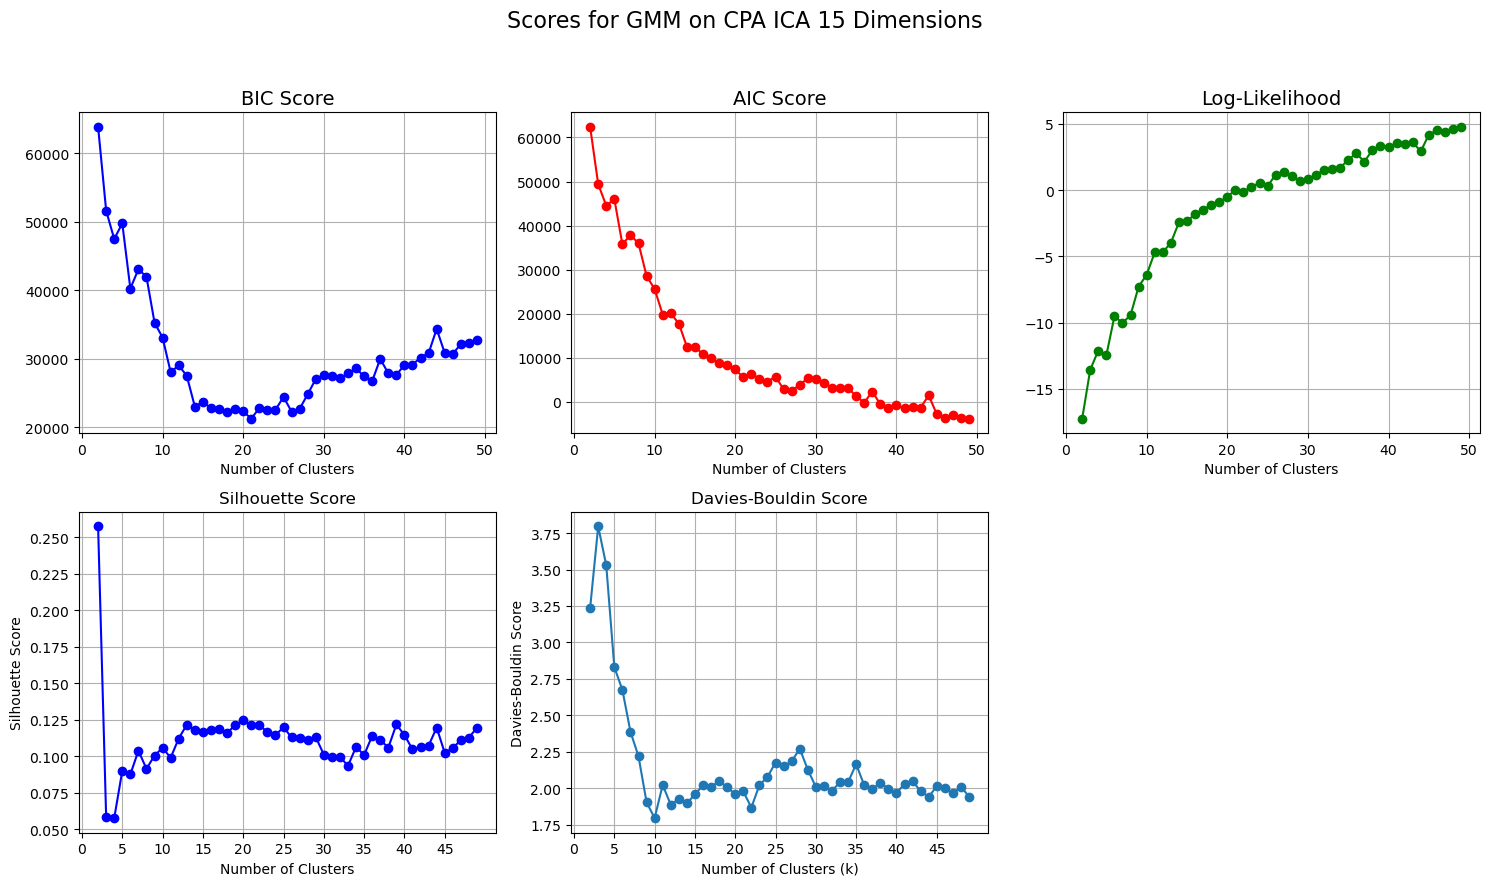

In [77]:
results = evaluate_gmm_clustering(cpa_ica_transformed_df)

plot_gmm_scores(
    k_values=results["k_values"],
    bic_scores=results["bic"],
    aic_scores=results["aic"],
    log_likelihoods=results["log_likelihood"],
    silhouette_scores=results["silhouette"],
    db_scores=results["davies_bouldin"],
    title_prefix="GMM on CPA ICA 15 Dimensions"
)


### Clustering on RP

In [78]:
### We will start with 30 RP diemnsions because that is what our initial results showed.
# Apply RP
optimal_dimensions = 30  # Optimal dimensions based on RP analysis from earlier
cpa_rp = GaussianRandomProjection(n_components=optimal_dimensions, compute_inverse_components=False, random_state=30)

rp_cpa_transformed = cpa_rp.fit_transform(cpa_train)


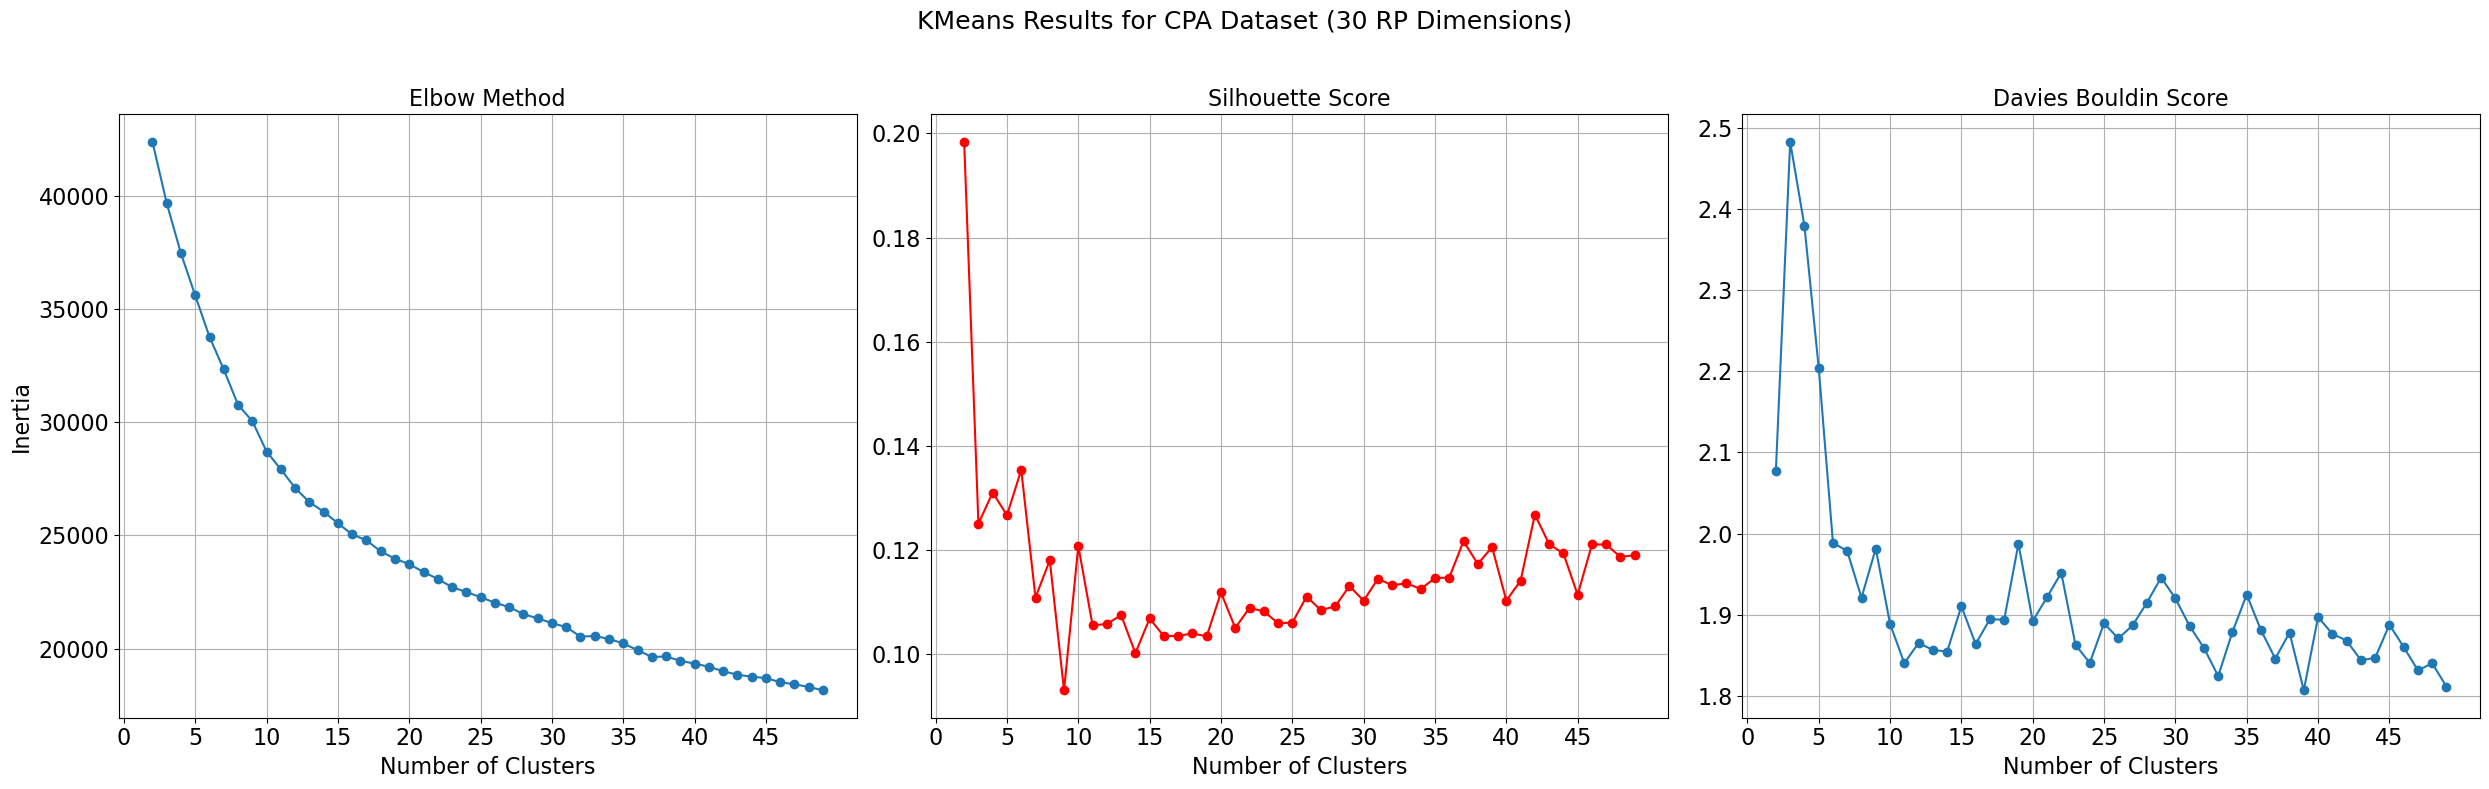

In [79]:
rp_kmeans_results = evaluate_kmeans_clustering(rp_cpa_transformed)

plot_kmeans_scores(
    k_values=rp_kmeans_results["k_values"],
    inertia=rp_kmeans_results["inertia"],
    silhouette=rp_kmeans_results["silhouette"],
    db_scores=rp_kmeans_results["davies_bouldin"],
    title="KMeans Results for CPA Dataset (30 RP Dimensions)"
)

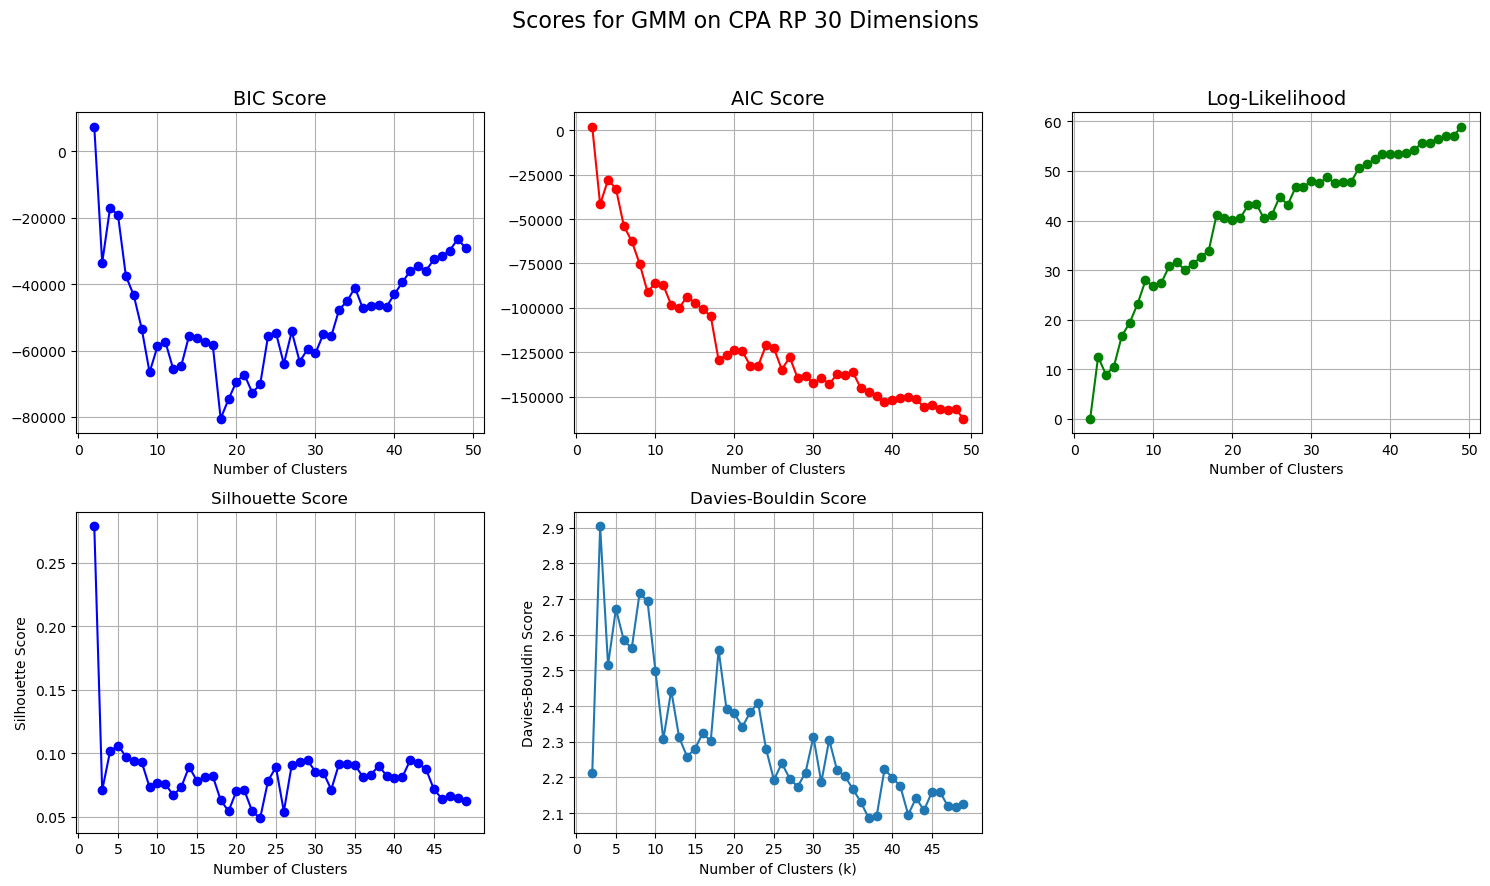

In [80]:
rp_results = evaluate_gmm_clustering(rp_cpa_transformed)

plot_gmm_scores(
    k_values=rp_results["k_values"],
    bic_scores=rp_results["bic"],
    aic_scores=rp_results["aic"],
    log_likelihoods=rp_results["log_likelihood"],
    silhouette_scores=rp_results["silhouette"],
    db_scores=rp_results["davies_bouldin"],
    title_prefix="GMM on CPA RP 30 Dimensions"
)

### Neural Net Calculations


In [81]:
import time

from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, learning_curve, LearningCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, log_loss, RocCurveDisplay
)


In [82]:


def train_and_score_nn(X, y, random_state=30):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Create model and CV strategy
    model = MLPClassifier(hidden_layer_sizes=(100, 20), activation='relu', max_iter=1000, random_state=random_state)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    results = {}

    # Evaluate all desired metrics
    metrics = ["accuracy", "f1", "precision", "roc_auc"]
    for scoring in metrics:
        train_sizes, train_scores, valid_scores, *_ = learning_curve(
            estimator=model,
            X=X_train,
            y=y_train,
            train_sizes=np.linspace(0.001, 1.0, 15),
            scoring=scoring,
            cv=cv,
            n_jobs=-1,
            return_times=True,
            random_state=random_state
        )
        results[f"{scoring}_train_sizes"] = train_sizes
        results[f"{scoring}_train_mean"] = np.mean(train_scores, axis=1)
        results[f"{scoring}_train_std"] = np.std(train_scores, axis=1)
        results[f"{scoring}_valid_mean"] = np.mean(valid_scores, axis=1)
        results[f"{scoring}_valid_std"] = np.std(valid_scores, axis=1)

    # Time model training
    start = time.time()
    model.fit(X_train, y_train)
    elapsed_time = time.time() - start
    print(f"⏱️ Wall Clock Time: {elapsed_time:.2f} seconds")
    results["train_time"] = elapsed_time

    # Loss curves
    model.fit(X_train, y_train)
    results["train_loss"] = model.loss_curve_

    model.fit(X_test, y_test)
    results["test_loss"] = model.loss_curve_

    return results


In [88]:
def display_nn_results(results, subplot_titles=None):
    fig, axs = plt.subplots(1, 3, figsize=(20, 8))
    fig.tight_layout(pad=5.0)

    fig.suptitle(subplot_titles, fontsize=16)

    for idx, metric in enumerate(["accuracy", "f1"]):
        sizes = results[f"{metric}_train_sizes"]
        train_mean = results[f"{metric}_train_mean"]
        train_std = results[f"{metric}_train_std"]
        valid_mean = results[f"{metric}_valid_mean"]
        valid_std = results[f"{metric}_valid_std"]

        axs[idx].plot(sizes, train_mean, label='Train', marker='o')
        axs[idx].fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)

        axs[idx].plot(sizes, valid_mean, label='Validation', marker='o')
        axs[idx].fill_between(sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2)

        axs[idx].set_title(f"Learning Curve ({metric.capitalize()})")
        axs[idx].set_xlabel("Training Set Size")
        axs[idx].set_ylabel(metric.capitalize())
        axs[idx].grid(True)
        axs[idx].legend()

    # Loss Curve
    fig.suptitle(subplot_titles, fontsize=16)
    axs[2].plot(results["train_loss"], label='Train')
    axs[2].plot(results["test_loss"], label='Test')
    axs[2].set_title("Loss Curve for NN Standard Data")
    axs[2].set_xlabel("Training Iteration")
    axs[2].set_ylabel("Loss")
    axs[2].grid(True)
    axs[2].legend()


    folder_path = 'images/nn_results/'
    ext =  '.png'
    file_name = f'{subplot_titles}{ext}'
    plt.savefig(f'{folder_path}{file_name}')

    

    plt.show()


##### Base NN

In [84]:
# Load dataset
data = pd.read_csv('Input_data/cpa_preprocessed.csv')

# Define high traffic in-person shopper threshold
high_traffic_threshold = data['NumStorePurchases'].median()  # Arbritrary threshold based on median

# Create target variable
data['HighTrafficShopper'] = (data['NumStorePurchases'] > high_traffic_threshold).astype(int)

# Drop the NumStorePurchases column as it is now represented in the target variable
cpa_df = data.drop(columns=['NumStorePurchases'])


# Drop target variable
target  =   data['HighTrafficShopper']  # Target variable
cpa_input_data = data.drop(columns=['NumStorePurchases', 'HighTrafficShopper'])


In [85]:
# Standardize the data
scaler = StandardScaler()
cpa_scaled_df = scaler.fit_transform(cpa_input_data)



In [86]:
base_results =train_and_score_nn(cpa_scaled_df, target, random_state=30)

⏱️ Wall Clock Time: 1.92 seconds


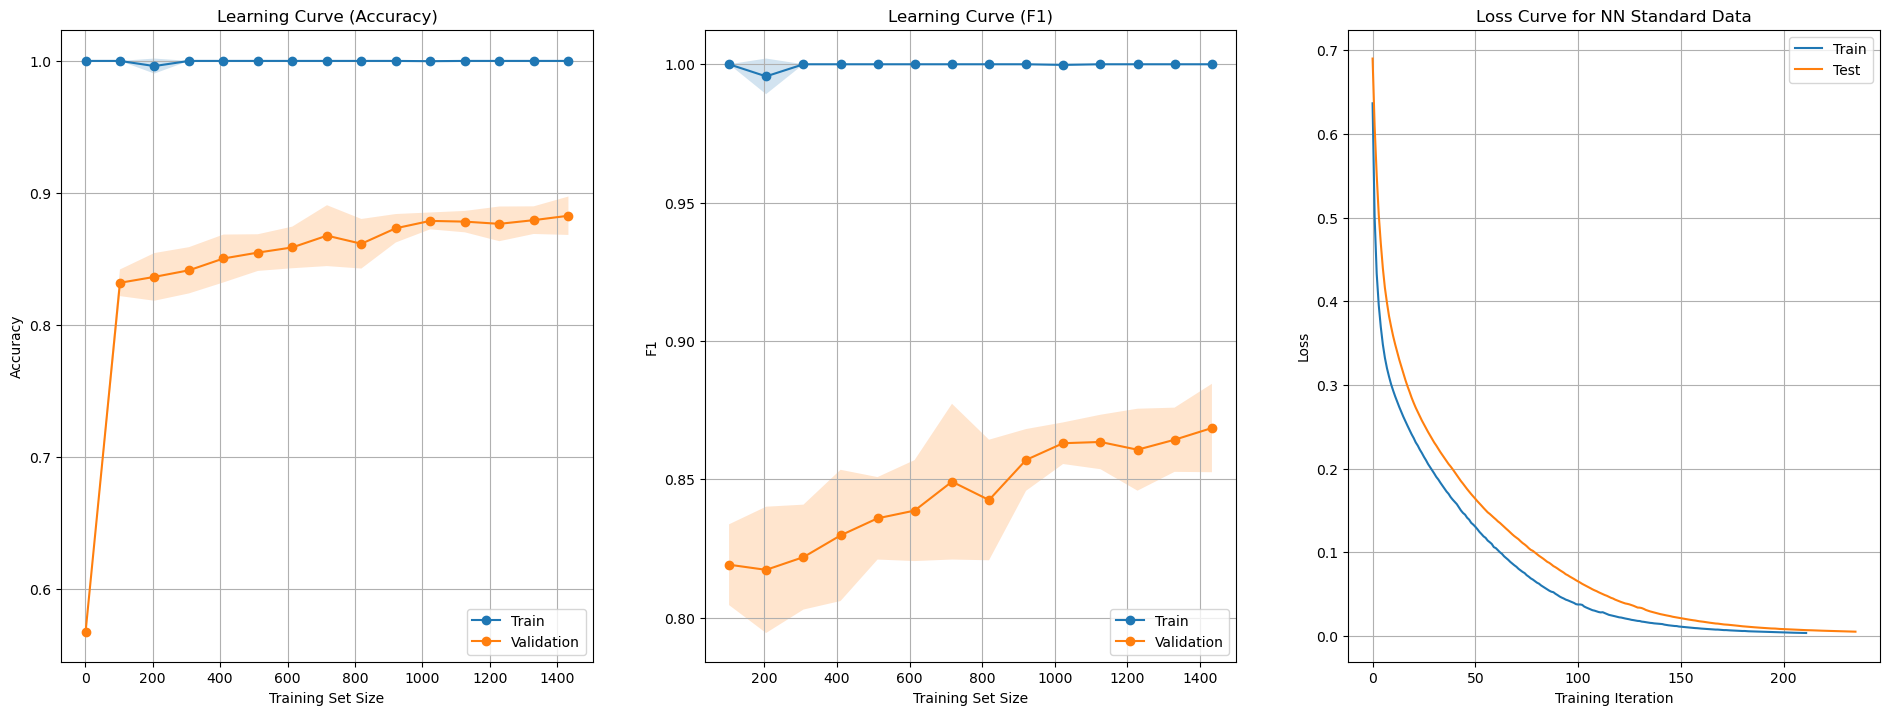

In [89]:
display_nn_results(base_results)